<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_06/blob/main/goit_python_ds_hw_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET LOAD

In [651]:
from pathlib import Path

SAVED_DATAFRAME_BASE = Path("/content/")
URL="https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download&authuser=0"
OUTPUT = Path("/content/data.zip")
CSV_DATA_PATH  = Path("/content/data")
SEED = 42

In [652]:
if not OUTPUT.is_file():
  !wget -q -O $OUTPUT $URL

if OUTPUT.is_file() and not CSV_DATA_PATH.is_dir():
  !unzip -q -o $OUTPUT
  #!rm $OUTPUT

## data_2d

In [653]:
import pandas as pd

df_2d = pd.read_csv(CSV_DATA_PATH.joinpath("data_2d.csv"), header=None ,names=["X","Y","Z"])
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [654]:
# df_2d.describe()

## mnist

In [655]:
df_mnist_raw = pd.read_csv(CSV_DATA_PATH.joinpath("mnist.csv"), header=None)
df_mnist_y = df_mnist_raw.iloc[:,0]
df_mnist = df_mnist_raw.iloc[:,1:]
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 3.0 MB


In [656]:
df_mnist_y.value_counts().sort_index()

0    42
1    67
2    55
3    45
4    55
5    50
6    43
7    49
8    40
9    54
Name: 0, dtype: int64

In [657]:
df_mnist_y.value_counts().min()

40

In [658]:
df_mnist_y.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

### SCALE mnist pixels 0..255 to 0..1

In [659]:
df_mnist.describe()

1      2      3      4      5      6      7      8      9      10   \
count  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...         775         776    777    778    779    780    781    782  \
count  ...  500.000000  500.000000  500.0  500.0  500.0  500.0  500.0  500.0   
mean   ...    0.506000    0.256000    0.0    0.0    0.0    0.0    0.0    0.0   
std    ...   11.314504    5.724334    0.0    0.0    0.0    0.0    0.0    0.0   
min    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
25%    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
50%    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
75%    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
max    ...  253.000000  128.000000    0.0    0.0    0.0    0.0    0.0    0.0   

         783    784  
count  500.0  500.0  
mean     0.0    0.0  
std      0.0    0.0  
min      0.0    0.0  
25%      0.0    0.0  
50%      0.0    0.0  
75%      0.0    0.0  
max      0.0    0.0  

[8 rows x 784 columns]

In [660]:
def downscale_pix_val(df):
 return df / 255.

def upscale_pix_val(df):
 return df * 255

df_mnist = downscale_pix_val(df_mnist)

In [661]:
df_mnist.describe()

1      2      3      4      5      6      7      8      9      10   \
count  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0  500.0   
mean     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
std      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
min      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
25%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
50%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75%      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
max      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...         775         776    777    778    779    780    781    782  \
count  ...  500.000000  500.000000  500.0  500.0  500.0  500.0  500.0  500.0   
mean   ...    0.001984    0.001004    0.0    0.0    0.0    0.0    0.0    0.0   
std    ...    0.044371    0.022448    0.0    0.0    0.0    0.0    0.0    0.0   
min    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
25%    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
50%    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
75%    ...    0.000000    0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
max    ...    0.992157    0.501961    0.0    0.0    0.0    0.0    0.0    0.0   

         783    784  
count  500.0  500.0  
mean     0.0    0.0  
std      0.0    0.0  
min      0.0    0.0  
25%      0.0    0.0  
50%      0.0    0.0  
75%      0.0    0.0  
max      0.0    0.0  

[8 rows x 784 columns]

# TASK 1

## Метод K-means для кластеризації

### Пошук cумм квадратів відстаней від точок до їх найближчого центру кластера.

In [662]:
!pip install hdbscan

import hdbscan
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import decomposition

import numpy as np

method_kmeans = lambda cl: KMeans(n_clusters=cl, random_state=SEED, n_init="auto")


def get_kmeans_list(df, k_list, method=method_kmeans, axis=0):
  # sc = StandardScaler(with_std=True)
  # X = sc.fit_transform(df)
  # X = df
  if axis is None:
    X = df
  else:
    X = scale(df, axis=axis, with_mean=True, with_std=True)
  kmeans_list = []
  for cl in k_list:
    kmeans = method(cl)
    kmeans.fit(X)
    kmeans_list.append(kmeans)
    # print(f"{kmeans.inertia_=}")
  return kmeans_list, X

In [663]:
def best_silhouette_score(k_list, kmeans_list, X):
  scores = []
  for kmeans in kmeans_list:
    labels = kmeans.labels_
    scores.append(silhouette_score(X, labels))
  best_score = max(scores)
  best_k  = k_list[scores.index(best_score)]
  return best_k, best_score, scores

In [664]:
import matplotlib.pyplot as plt

figsize=(18, 8)

def plot_kmeans(k_list, kmeans_list, version=""):
  inertias = [ kmeans.inertia_ for kmeans in kmeans_list ]
  fig = plt.figure(1, figsize=figsize)
  x = k_list
  y = inertias

  # spline
  spl = make_interp_spline(x, y, k=3)
  x_spline = np.linspace(min(x), max(x), 200)
  y_spline = spl(x_spline)

  plt.plot(x_spline, y_spline, 'r-', linewidth=0.5, label='Spline of Elbow')

  plt.plot(x , inertias, marker='o', linewidth=2 ,label='Elbow')
  if version:
    version = f", ({version})"
  plt.xlabel('Кількість кластерів (k)')
  plt.ylabel('Сума квадратів відстаней до центру кластера')
  plt.title(f'Метод ліктя для пошуку оптимального k{version}')
  if len(k_list) < 40:
    plt.xticks(k_list)
  else:
    plt.xticks([k for k in k_list if k % (2 if k < 100 else 5) == 0])
  plt.grid(True)
  plt.legend()
  plt.show()

In [665]:
from scipy.interpolate import make_interp_spline

def plot_diff_kmeans(k_list, kmeans_list, version=""):
  inertias = [ kmeans.inertia_ for kmeans in kmeans_list ]
  # print(np.diff(inertias))
  # print(np.diff(k_list))

  # dy_dx
  y = np.diff(inertias) / np.diff(k_list)
  x = k_list[:-1]

  # spline
  spl = make_interp_spline(x, y, k=2)
  x_spline = np.linspace(min(x), max(x), 200)
  y_spline = spl(x_spline)

  fig = plt.figure(1, figsize=figsize)

  plt.bar(x, y, label='$\\frac{dy}{dx}$')
  plt.plot(x_spline, y_spline, 'r-', label='Spline of $\\frac{dy}{dx}$')
  if version:
    version = f", ({version})"
  plt.xlabel('Кількість кластерів (k)')
  plt.ylabel('Зміна сумм квадратів відстаней до центру кластера')
  plt.title(f'Метод ліктя для пошуку оптимального k. Швидкість змін.{version}')
  if len(k_list) < 40:
    plt.xticks(k_list)
  else:
    plt.xticks([k for k in k_list if k % (2 if k < 100 else 5) == 0])
  plt.grid(True)
  plt.legend()
  plt.show()

In [666]:
def plot_silhouette_kmeans(k_list, kmeans_list, X, version=""):
  #inertias = [ kmeans.inertia_ for kmeans in kmeans_list ]
  best_k, best_score, scores = best_silhouette_score(k_list, kmeans_list, X)
  fig = plt.figure(1, figsize=figsize)
  plt.plot(k_list, scores, marker='x')
  plt.axvline(x=best_k, color = 'r', label = f'best_k: {best_k}, score: {best_score:.4}')
  plt.xlabel('Кількість кластерів (k)')
  plt.ylabel('silhouette score')
  if version:
    version = f", ({version})"
  plt.title(f'Пошуку оптимального k (silhouette score){version}')
  if len(k_list) < 40:
    plt.xticks(k_list)
  else:
    plt.xticks([k for k in k_list if k % (2 if k < 100 else 5) == 0])
  plt.grid(True)
  plt.legend()
  plt.show()
  print(f"{best_score=}")
  print(f"{best_k=}")

In [667]:
def plot_mnist_picture(df, id):
  data = df.iloc[id,:]
  p_size = int(data.shape[0]**(0.5))
  data = data.values.reshape(p_size, p_size)
  plt.imshow(data, cmap='gray_r')
  plt.axis('off')
  plt.show()


### DATASET 2D. (df_2d)

#### Пошук k, dataset df_2d

In [668]:
min_k, max_k = 2, 40
k_list = range(min_k, max_k + 1)

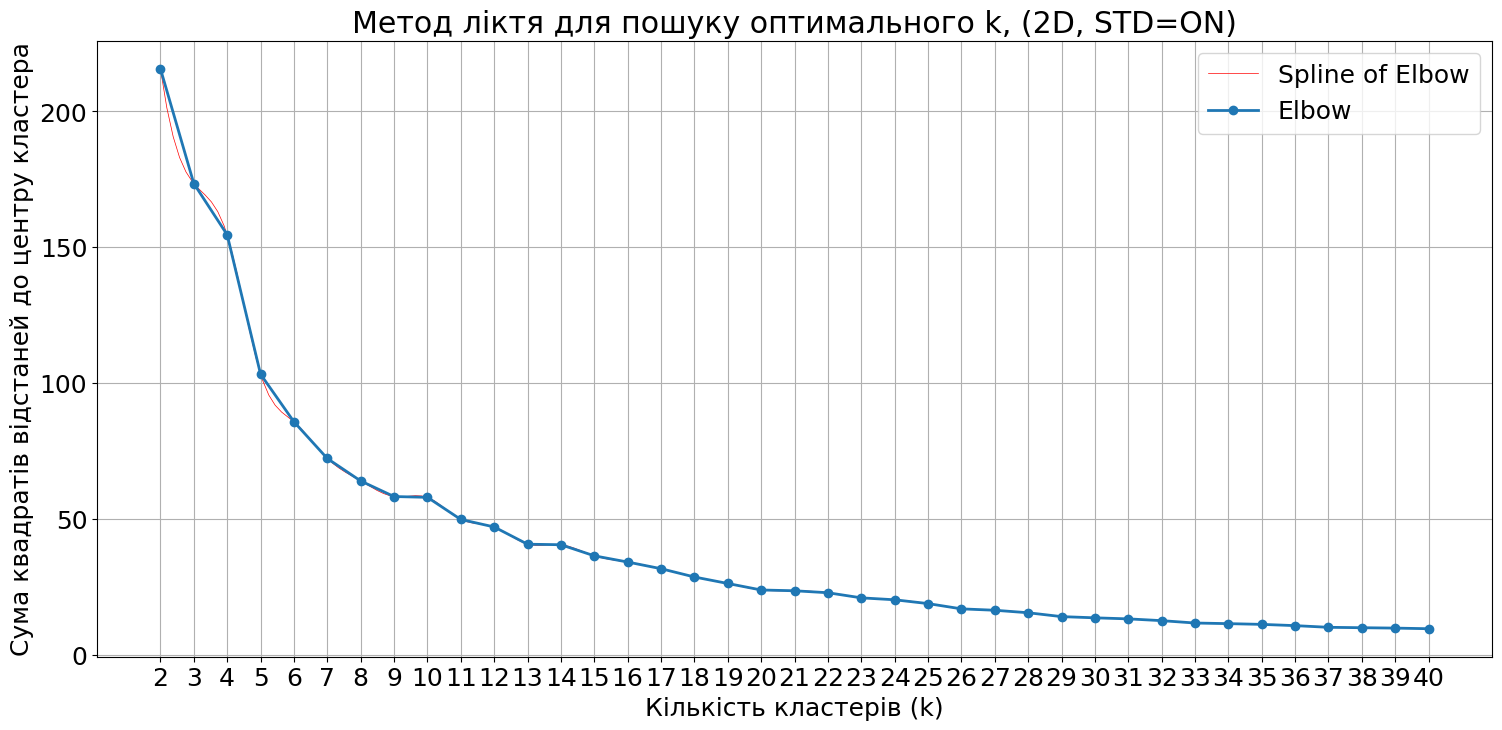

In [669]:
kmeans_list, X = get_kmeans_list(df_2d, k_list, axis=0)
version="2D, STD=ON"
plot_kmeans(k_list, kmeans_list,version=version)

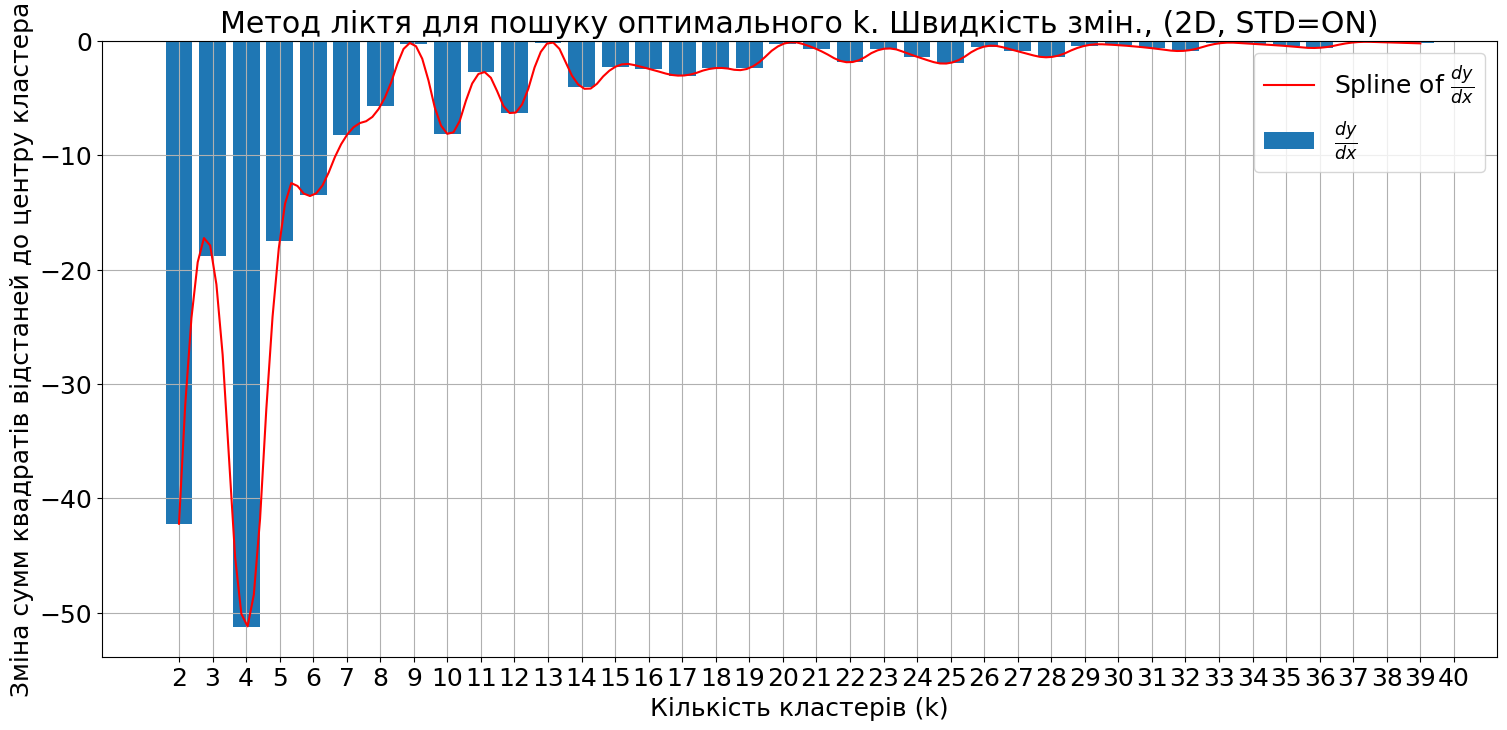

In [670]:
plot_diff_kmeans(k_list, kmeans_list, version=version)

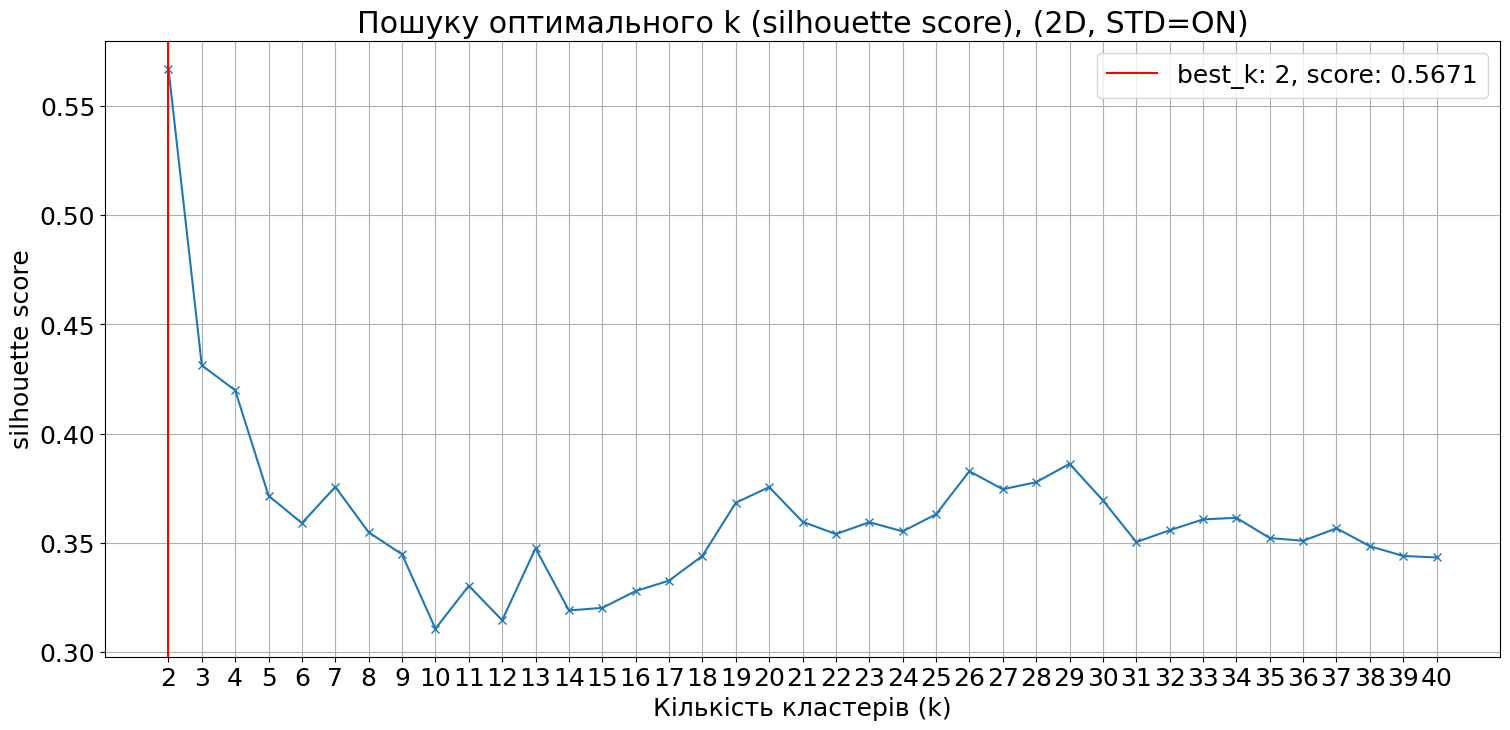

best_score=0.5671182203740045
best_k=2


In [671]:
plot_silhouette_kmeans(k_list, kmeans_list, X, version=version)

#### Результат для k=2, dataset df_2d

In [672]:
k = 2
k_id = k_list.index(k)
kmeans_2d = kmeans_list[k_id]

In [673]:
print(f"{kmeans_2d.labels_.shape}")
print(f"{kmeans_2d.labels_}")

(200,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Count class values

In [674]:
unique, counts = np.unique(kmeans_2d.labels_, return_counts=True)
for u,c in zip(unique, counts):
  print(u,c)

0 98
1 102


#### Distance

In [675]:
print("Cluster centers")
print(f"{kmeans_2d.cluster_centers_}")

Cluster centers
[[ 1.          0.56518053  0.82493211]
 [-0.96078431 -0.54301659 -0.79258183]]


In [676]:
distances = euclidean_distances(kmeans_2d.cluster_centers_)
print("Дистанція між центрами кластерів")
print(distances)

Дистанція між центрами кластерів
[[0.         2.77292757]
 [2.77292757 0.        ]]


### Інші методи кластеризації для первірки

#### DBScan

In [677]:
clustering = DBSCAN(eps=1, min_samples=5)
clustering.fit(scale(df_2d))
labels = clustering.labels_
print(clustering.components_.shape)
clusters = np.unique(labels[labels != -1], return_counts=True)
print("Clusters",len(clusters[0]), clusters[1])
labels

(197, 3)
Clusters 2 [100 100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#### HDBScan

In [678]:
clustering = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1)
clustering.fit(scale(df_2d))
labels = clustering.labels_
clusters = np.unique(labels[labels != -1], return_counts=True)
print("Clusters",len(clusters[0]), clusters[1])
labels

Clusters 2 [100 100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#### OPTICS

In [679]:
clustering = OPTICS(min_samples=20)
clustering.fit(scale(df_2d))
labels = clustering.labels_
clusters = np.unique(labels[labels != -1], return_counts=True)
print("Clusters",len(clusters[0]), clusters[1])
labels

Clusters 2 [100 100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### DATASET MINST. (df_mnist)

#### Пошук k, dataset df_mnist

In [680]:
min_k, max_k = 3, 30
k_list = range(min_k, max_k + 1)

In [681]:
kmeans_list, X = get_kmeans_list(df_mnist, k_list, axis=None)
version="MNIST, STD=OFF"

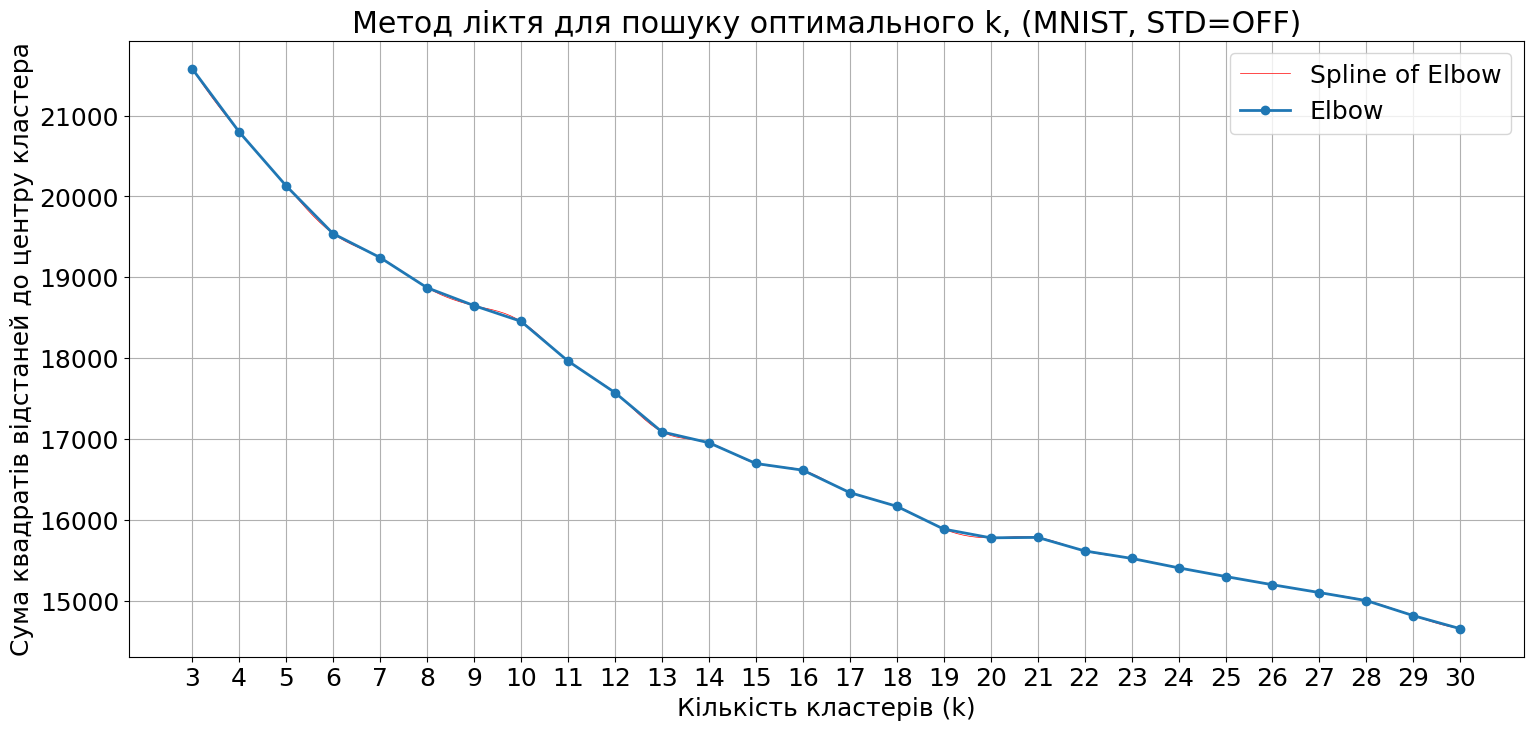

In [682]:
plot_kmeans(k_list, kmeans_list, version=version)

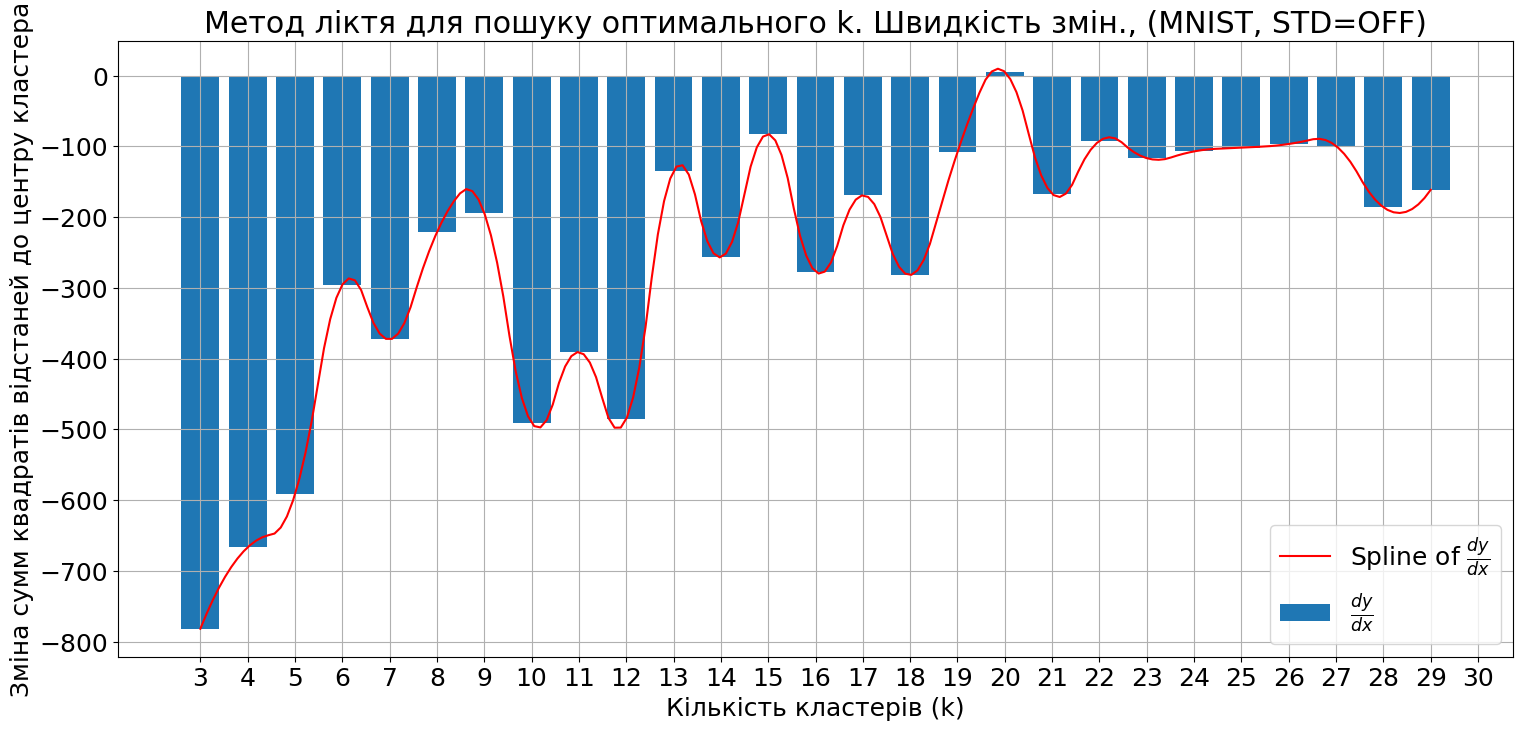

In [683]:
plot_diff_kmeans(k_list, kmeans_list, version=version)

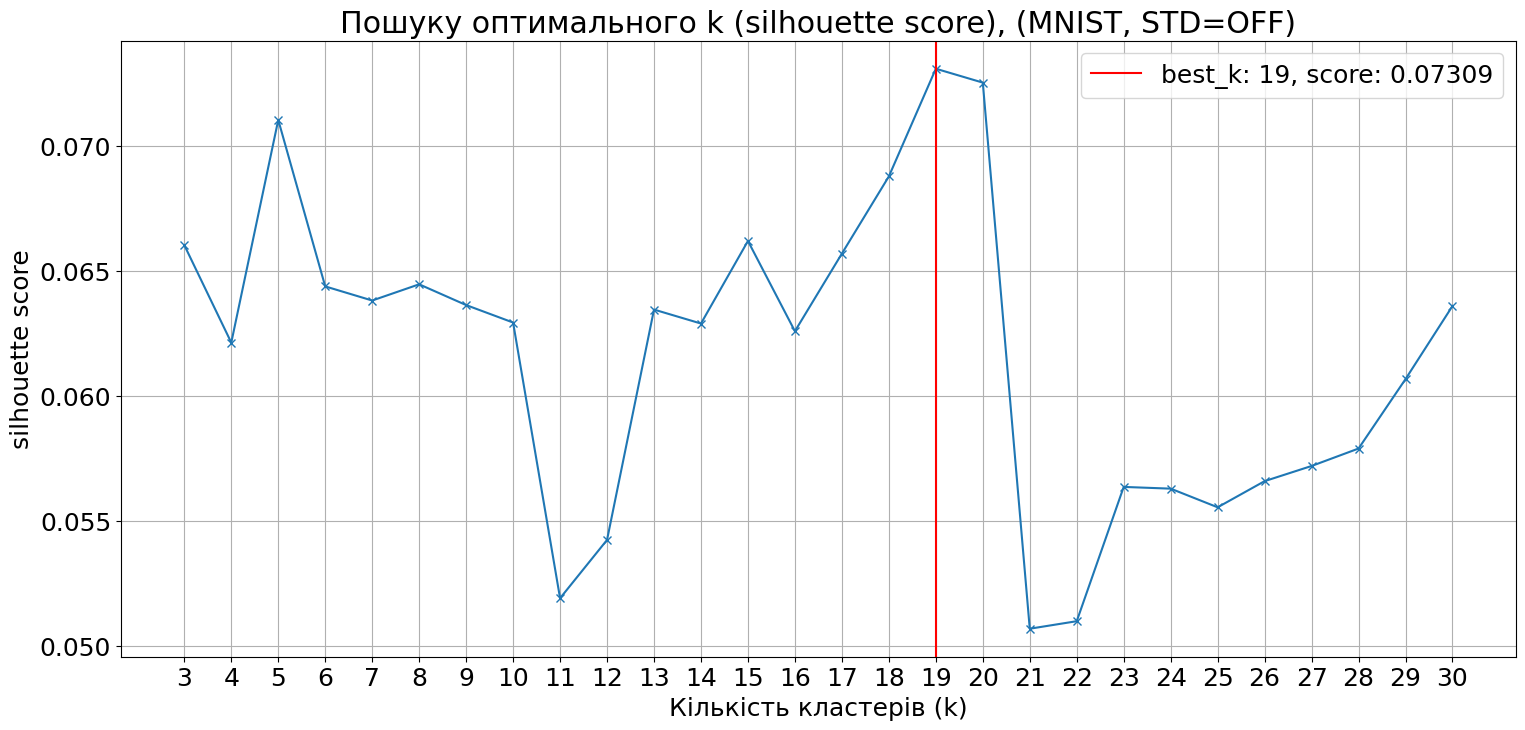

best_score=0.07308983650986063
best_k=19


In [684]:
plot_silhouette_kmeans(k_list, kmeans_list, X, version=version)

#### Результат для k=19, dataset df_mnist

In [685]:
k = 19
k_id = k_list.index(k)
kmeans_minst = kmeans_list[k_id]

In [686]:
print(f"{kmeans_minst.labels_}")
#print(f"{kmeans_minst.cluster_centers_=}")

[15  5  8  7 11  8  6  2  6  1 13 18  6  7 10 14 11  3 14  2  1 17 18  0
  2  4  3 11  7 10 12 10 12 18  1  5 15 10  5 10 10 15  2  8 10 12 10  5
 11 11 17 14  0 14 18  7 11  8 11  8  3  1  2  5  1  2 18 11 12 13  3 13
  5  1 10 15 12 15  1  1  2 17  5  3  9 11 15 12 18  8 12 17  1 12 10 11
 10 15 17 16 18 13  0 11 16 11  5  8  2  6  9  8 10  2 15  6  2 16  6  6
 12  6  3 17  6  2 13  0  9  0 17 17 14 15  9 10  7  8 18  6 17  3 12  8
  1 10  9  5  7  8  2 16  1 14 10  0 18  7 14  6  2 17  0 11 18 14  6  8
 10  2  2  1  5 14  5  8 10  9 10  9 10  9  0 13  9  6  5 14  7 10  8 10
  1  2  7  8 10 17  2  5  4 18  8 10  8 12  2 14  5  2 11  6 16 10  2  7
 12  1  1  0  3 12  4 15  8  5  9  6  8 15 17  8  9 15 15  3  5  5 11 10
 14 12  1 15  8 17 13  1 11  5  2 10  2  0  3 15  5  8  5 18  1 10  3 15
  2 10  9 10 14 13 12  7 10  6 16 11 10  9  5 10  5  6 15  1 16  5 17 16
  8 14  2  5  2  5  7  2 13 13  5  9  8 15 10  6 15 13  5 15  6 12 12  4
  7 14 10 11 17  1  7 14 10  8  2  8  7  1 17  7 15

#### Distance

In [687]:
print("Cluster centers")
print(f"{kmeans_minst.cluster_centers_}")
print(f"{kmeans_minst.cluster_centers_.shape=}")

Cluster centers
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
kmeans_minst.cluster_centers_.shape=(19, 784)


In [688]:
distances = euclidean_distances(kmeans_minst.cluster_centers_)
print("Дистанція між центрами кластерів")
print(distances)

Дистанція між центрами кластерів
[[ 0.          5.41643067  5.24735551  6.54443     8.26042614  6.69229702
   5.21653941  5.9308005   6.23516006  4.66012241  6.57891343  6.47458025
   4.72425258  7.25584857  5.61189669  5.97226251  7.28656542  5.29137984
   7.28742998]
 [ 5.41643067  0.          5.51791661  6.51536418  7.68410964  5.25888981
   3.90794292  6.66906768  4.83592443  4.91384425  5.6704456   6.34776962
   6.06314382  7.68401652  6.46904082  4.46563697  6.71651004  5.11278758
   6.22678633]
 [ 5.24735551  5.51791661  0.          4.6949152   8.5306363   6.35704
   4.15238034  7.25293653  5.72101748  4.85378834  6.22552812  4.5041328
   5.5388413   8.09015713  6.12944811  4.52112993  5.37306219  5.40035517
   5.97701046]
 [ 6.54443     6.51536418  4.6949152   0.          9.25891531  7.1123111
   5.26672943  7.422557    6.59461135  6.57122462  6.81379582  5.6480684
   6.33385001  7.95897457  6.9647414   4.58198641  6.40188623  6.35694469
   6.86536469]
 [ 8.26042614  7.68410964

#### Count class values

In [689]:
unique, counts = np.unique(kmeans_minst.labels_, return_counts=True)
for u,c in zip(unique, counts):
  print(u,c)

0 18
1 29
2 41
3 18
4 9
5 38
6 27
7 20
8 38
9 26
10 52
11 22
12 26
13 16
14 27
15 32
16 12
17 29
18 20


#### Principal component analysis (PCA).

In [690]:
pca = decomposition.PCA(0.95)
df_mnist_pca = pca.fit_transform(df_mnist)
print(f"{len(pca.components_)=}")
print(f"{df_mnist_pca.shape=}")

len(pca.components_)=114
df_mnist_pca.shape=(500, 114)


In [691]:
min_k, max_k = 3, 30
k_list_pca = list(range(min_k, max_k + 1))

In [692]:
kmeans_list_pca, X_pca = get_kmeans_list(df_mnist_pca, k_list_pca, axis=None)
version="MNIST, PCA(0.95), STD=OFF"

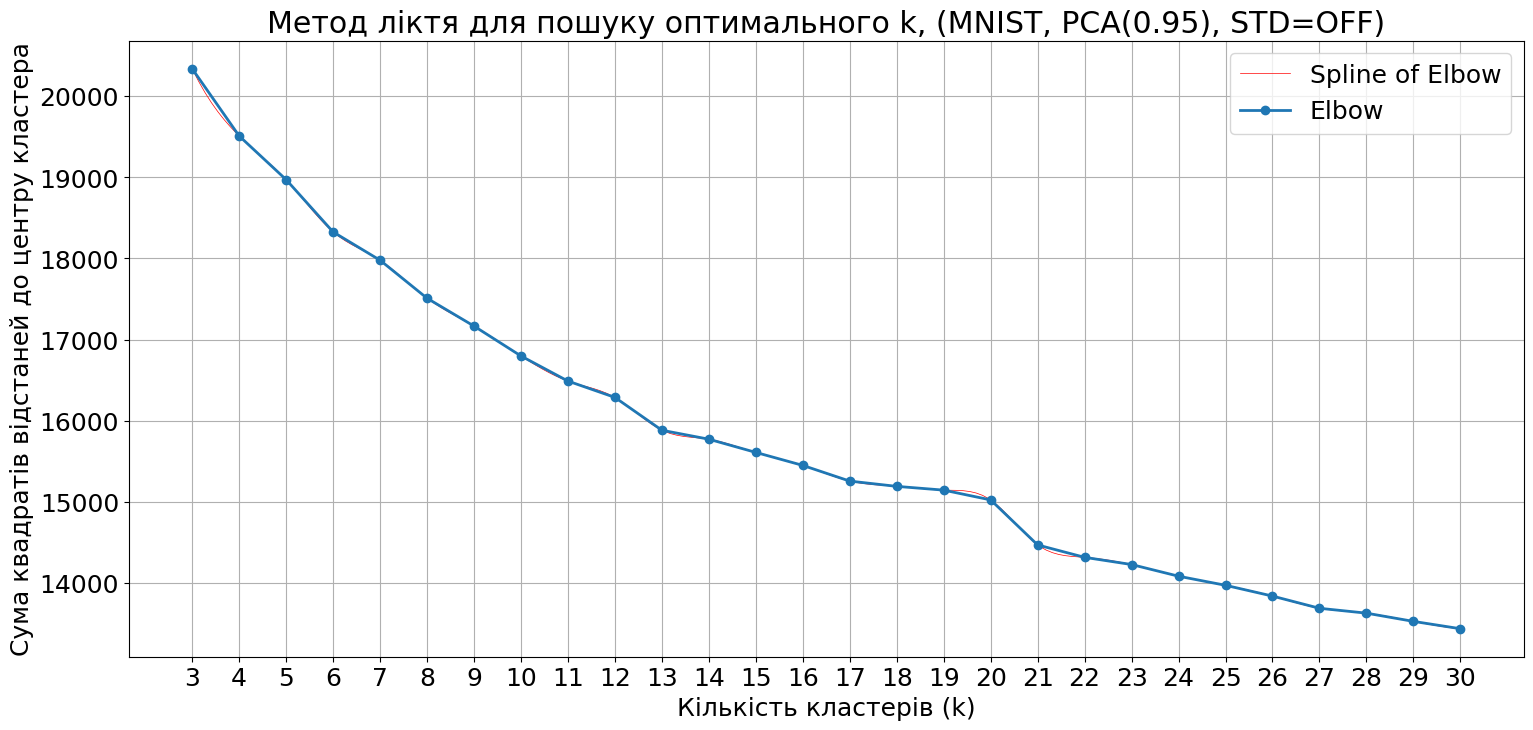

In [693]:
plot_kmeans(k_list_pca, kmeans_list_pca, version=version)

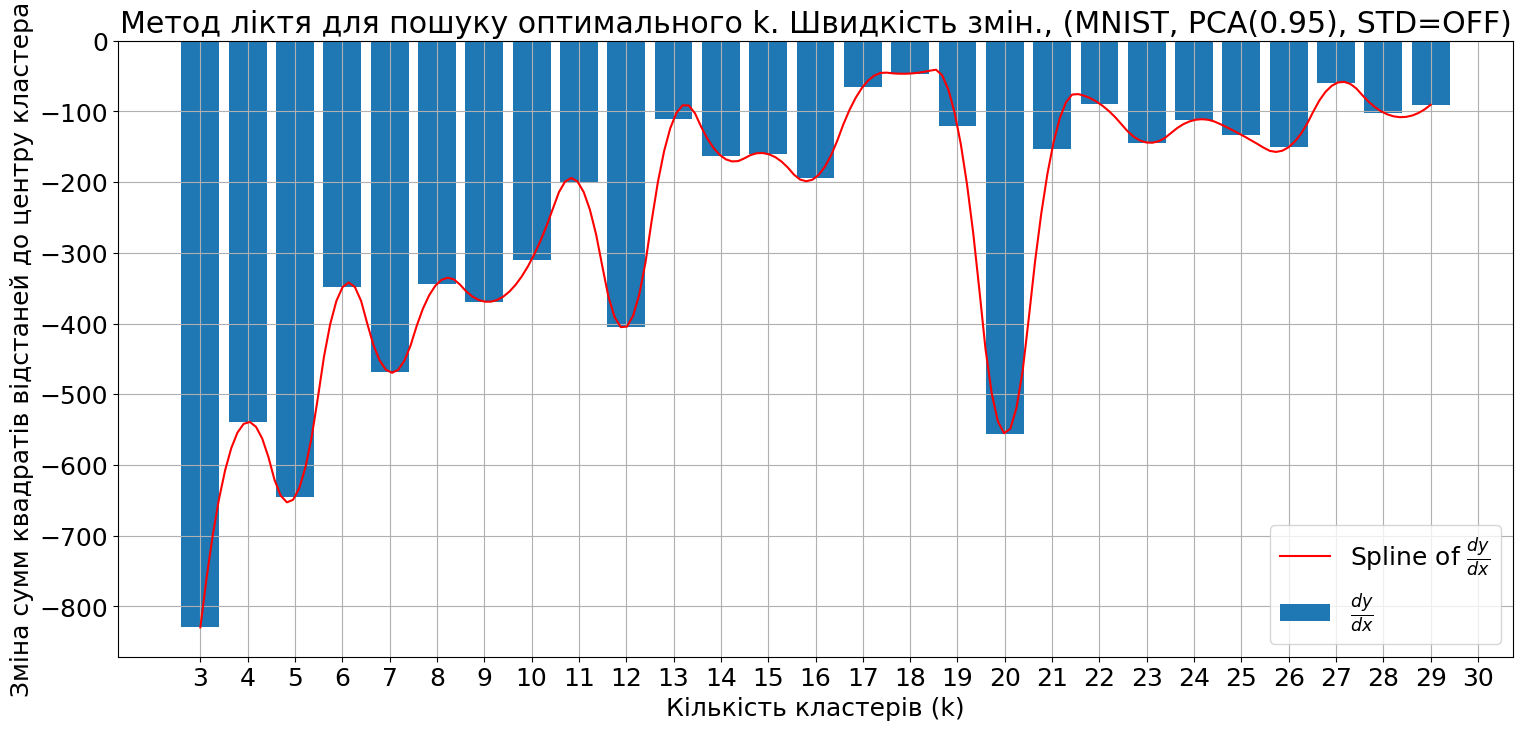

In [694]:
plot_diff_kmeans(k_list_pca, kmeans_list_pca, version=version)

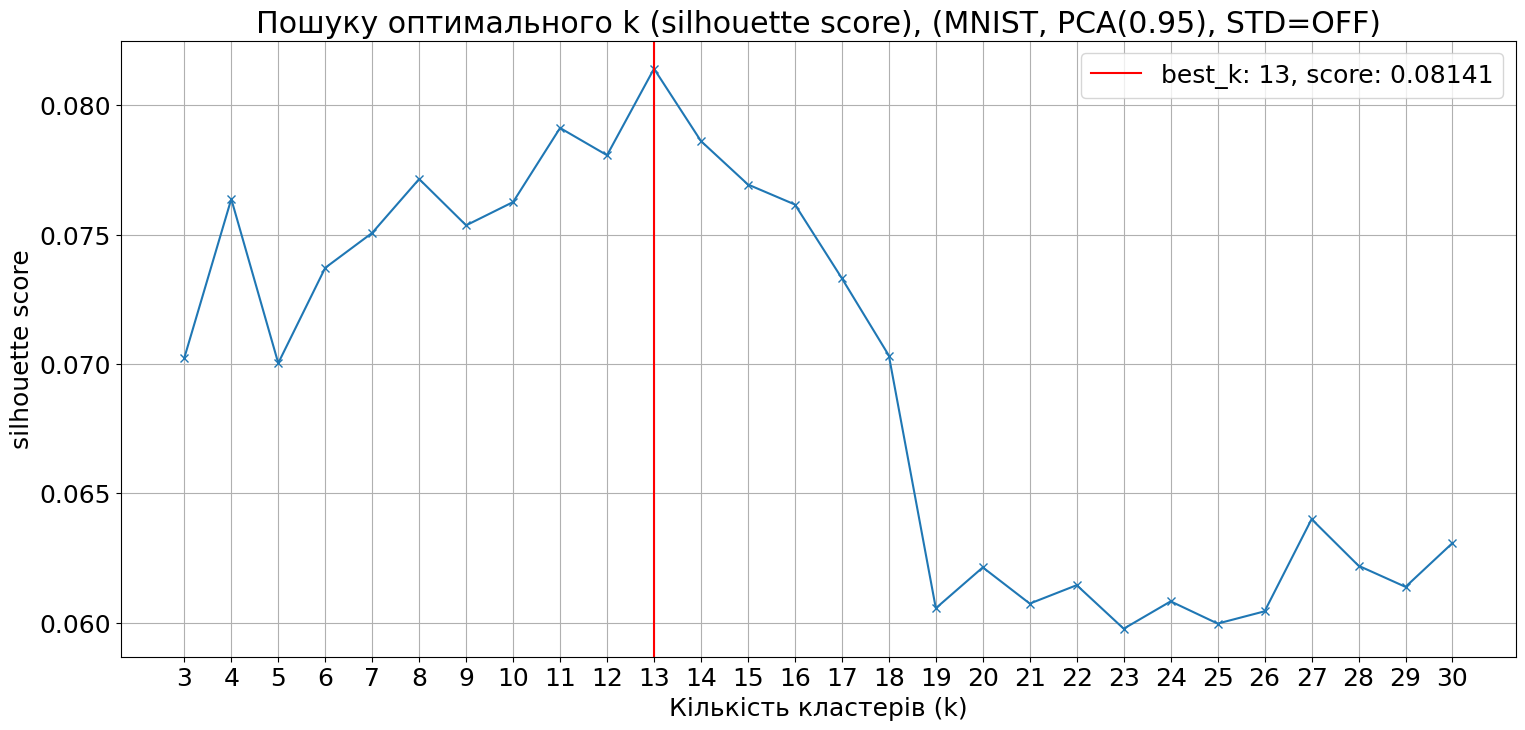

best_score=0.08141150955990363
best_k=13


In [695]:
plot_silhouette_kmeans(k_list_pca, kmeans_list_pca, X_pca, version=version)

#### Зображення символу

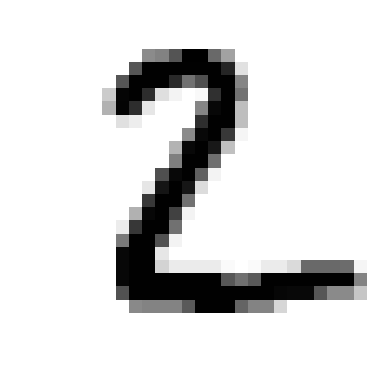

In [696]:
image_id = 1
plot_mnist_picture(df_mnist, image_id)

In [697]:
def restore_img(pca, df, shape_x=28, shape_y=28):
  X_restored = pca.inverse_transform(df)
  return pd.DataFrame(X_restored.reshape(-1, shape_x * shape_y))

df_mnist_pca.shape=(500, 114)
stretched.shape=(500, 784)


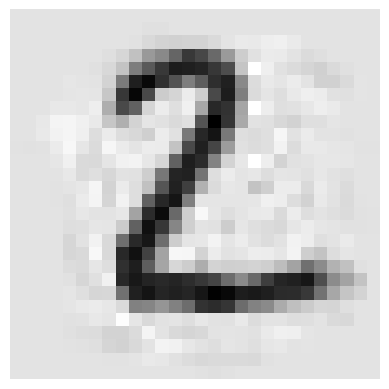

In [698]:
print(f"{df_mnist_pca.shape=}")
stretched = restore_img(pca, df_mnist_pca)
print(f"{stretched.shape=}")
plot_mnist_picture(stretched, image_id)

### Інші методи кластеризації для первірки

#### DBScan

In [699]:
print(f"{df_mnist_pca.shape=}")
clustering = DBSCAN(eps=0.5, min_samples=30)

clustering.fit(scale(df_mnist_pca))
labels = clustering.labels_
print(clustering.components_.shape)
clusters = np.unique(labels[labels != -1], return_counts=True)
print("Clusters",len(clusters[0]), clusters[1])
labels

df_mnist_pca.shape=(500, 114)
(0, 114)
Clusters 0 []


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

#### HDBScan

In [700]:
clustering = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=6)
clustering.fit((df_mnist))
labels = clustering.labels_
clusters = np.unique(labels[labels != -1], return_counts=True)
print("Clusters",len(clusters[0]), clusters[1])
labels

Clusters 8 [ 4  8  2  2  2  6 74  2]


array([ 4, -1,  6, -1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  6, -1,  6, -1, -1,
       -1, -1, -1,  6, -1,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  6, -1,  2, -1, -1, -1, -1, -1, -1,  5, -1,
       -1, -1, -1,  0,  6, -1, -1, -1, -1, -1, -1,  6, -1, -1, -1, -1, -1,
       -1, -1, -1,  5, -1,  6, -1, -1, -1,  6, -1,  5, -1, -1, -1, -1,  7,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6,
        1,  6,  0, -1,  3, -1, -1,  6, -1,  6, -1, -1,  1, -1, -1, -1, -1,
       -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1,
       -1, -1, -1, -1, -1,  6,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1,
       -1, -1,  6,  6,  6, -1, -1, -1, -1,  6, -1, -1, -1, -1, -1,  6,  6,
        6,  2, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,
       -1, -1,  4,  6, -1

#### OPTICS

In [701]:
clustering = OPTICS(min_samples=5)
clustering.fit((df_mnist))
labels = clustering.labels_
clusters = np.unique(labels[labels != -1], return_counts=True)
print("Clusters",len(clusters[0]), clusters[1])
labels

Clusters 4 [ 8 55  6 12]


array([-1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  3,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,  3,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        3, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  3, -1, -1, -1, -1,
       -1,  1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  3, -1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1,  1, -1

### Group

# TASK 2

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [702]:
from sklearn import decomposition

## Dataset df_2d

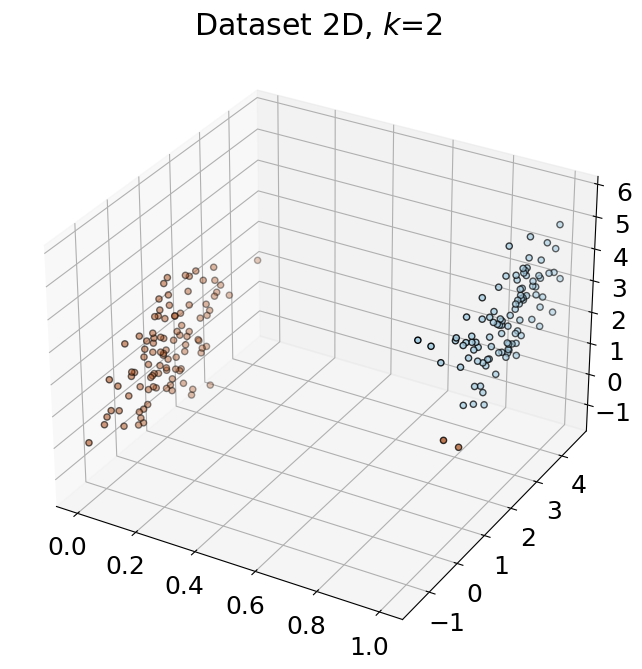

In [703]:
# print(kmeans_2d.labels_.shape)
fig = plt.figure(1, figsize=(12, 8))
plt.clf()

ax = fig.add_subplot(111, projection="3d")
#ax = fig.add_subplot(111)

#ax.set_position([0, 0, 0.6, 1])

plt.cla()

X = df_2d
#print(X.shape)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=kmeans_2d.labels_, cmap="Paired", edgecolor="k")
plt.title(f"Dataset 2D, $k$={kmeans_2d.n_clusters}")
plt.show()

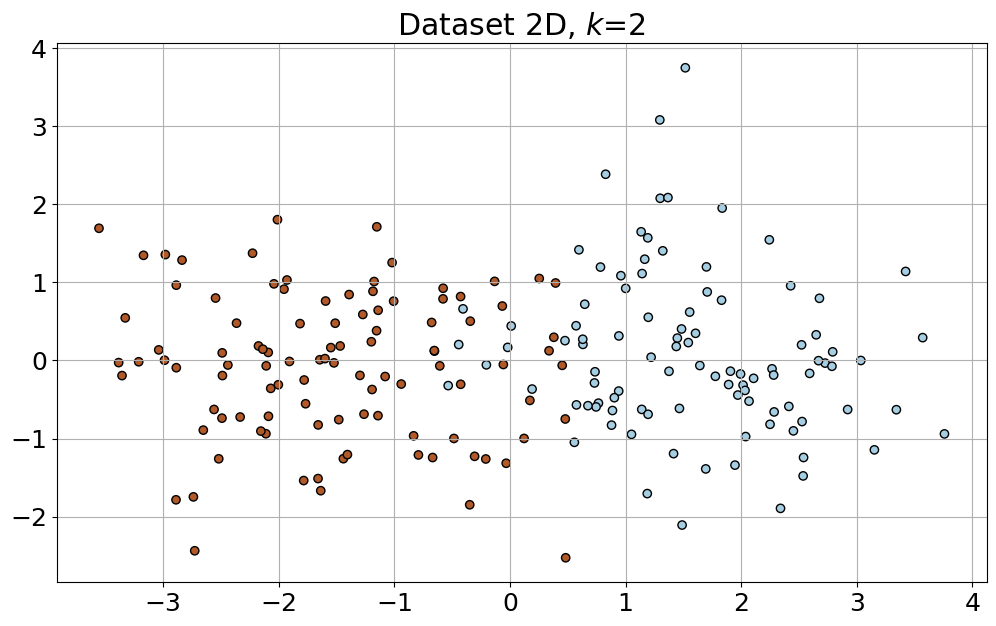

In [704]:
fig = plt.figure(1, figsize=(12, 7))
plt.clf()
ax = fig.add_subplot(111)
plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(df_2d)
X = pca.transform(df_2d)
ax.scatter(X[:, 0], X[:, 1], c=kmeans_2d.labels_, cmap="Paired", edgecolor="k")
plt.title(f"Dataset 2D, $k$={kmeans_2d.n_clusters}")
plt.grid()
plt.show()

## Dataset df_mnist

(500, 3)


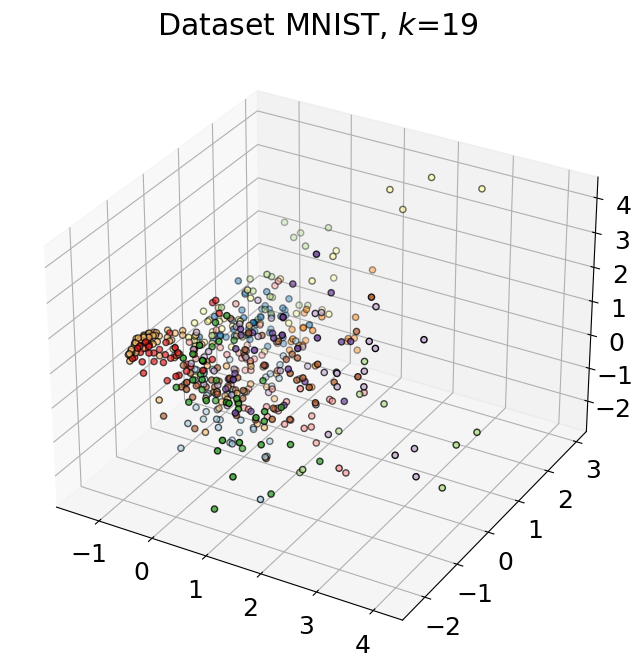

In [705]:
fig = plt.figure(1, figsize=(12, 8))
plt.clf()

ax = fig.add_subplot(111, projection="3d")
#ax = fig.add_subplot(111)

#ax.set_position([0, 0, 0.6, 1])

plt.cla()

pca = decomposition.PCA(n_components=3)
#pca.fit(df_mnist)
X = scale(pca.fit_transform(scale(df_mnist)))

print(X.shape)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_minst.labels_, cmap="Paired", edgecolor="k")
plt.title(f"Dataset MNIST, $k$={kmeans_minst.n_clusters}")
plt.show()

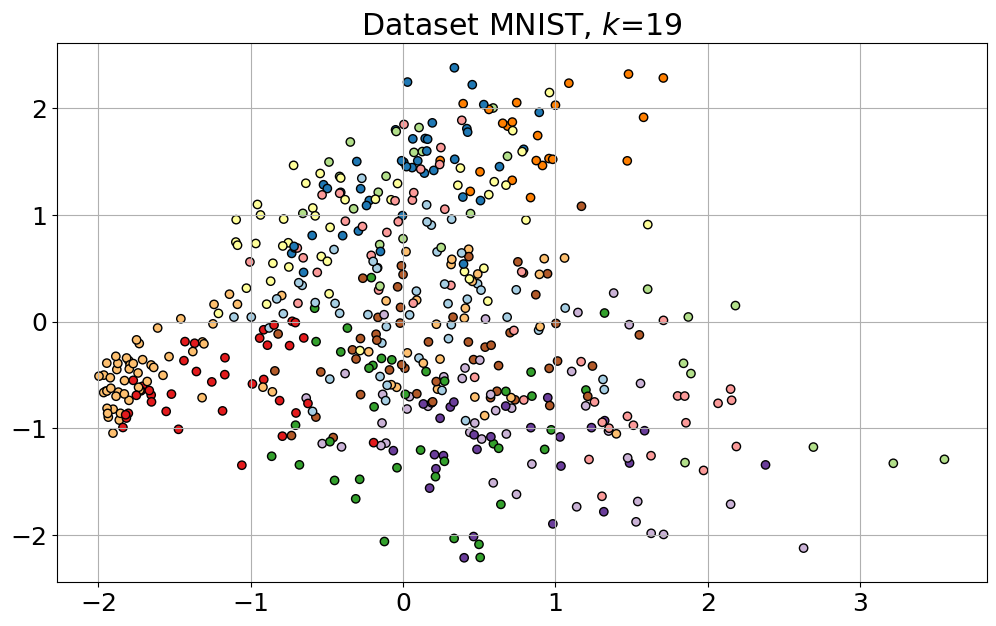

In [706]:
fig = plt.figure(1, figsize=(12, 7))
plt.clf()
ax = fig.add_subplot(111)
plt.cla()
pca = decomposition.PCA(n_components=2)
#pca.fit(scale(df_mnist))
X = scale(pca.fit_transform((df_mnist)))
ax.scatter(X[:, 0], X[:, 1], c=kmeans_minst.labels_, cmap="Paired", edgecolor="k")
plt.title(f"Dataset MNIST, $k$={kmeans_minst.n_clusters}")
plt.grid()
plt.show()

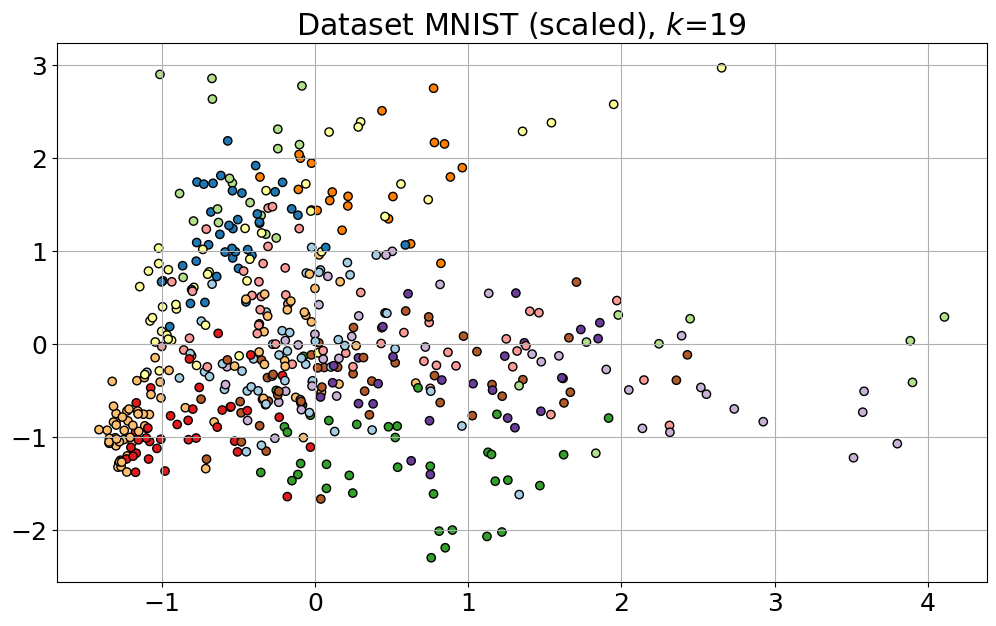

In [707]:
fig = plt.figure(1, figsize=(12, 7))
plt.clf()
ax = fig.add_subplot(111)
plt.cla()
pca = decomposition.PCA(n_components=2)
#pca.fit(scale(df_mnist))
X = scale(pca.fit_transform(scale(df_mnist)))
ax.scatter(X[:, 0], X[:, 1], c=kmeans_minst.labels_, cmap="Paired", edgecolor="k")
plt.title(f"Dataset MNIST (scaled), $k$={kmeans_minst.n_clusters}")
plt.grid()
plt.show()

## MINST EXTRA - ClustImage

In [708]:
!pip install clustimage
from clustimage import Clustimage

In [709]:
# init with default parameters
cl = Clustimage()

# load example with flowers
# path_to_imgs = df_mnist
#X = cl.import_data(df_mnist.values)
X = df_mnist.values
# Run the model to find the optimal clusters
results = cl.fit_transform(X, min_clust=5)
print(results.keys())



# Cluster evaluation plot
#cl.clustimage.plot()

# # Unique images
# cl.results_unique.keys()
# cl.plot_unique(img_mean=False)

# # Scatter
# cl.scatter(dotsize=50, img_mean=False)

# # Plot clustered images
# cl.plot(labels=0)

# # Plot dendrogram
# cl.dendrogram()

# # Predict
# results_find = cl.find(X[0:5], k=None, alpha=0.05)
# cl.plot_find()
# cl.scatter()

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Scaling images..
[clustimage] >INFO> Writing images to tempdir [/tmp/clustimage]
[clustimage]: 100%|██████████| 500/500 [00:00<00:00, 6128.15it/s]
[clustimage] >INFO> Extracting features using method: [pca]
[clustimage] >INFO> Extracted features using [pca]: samples=500, features=114
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clustimage] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 20/20 [00:00<00:00, 92.22it/s]
[clustimage] >INFO> Compute dendrogram threshold.
[clustimage] >INFO> Optimal number clusters detected: [24].
[clustimage] >INFO> Fin.
[clustimage] >INFO> Updating cluster-labels and cluster-model based o

dict_keys(['img', 'feat', 'xycoord', 'pathnames', 'labels', 'url', 'filenames'])


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])
idx: [5, 239, 136, 327, 372, 53, 367, 373, 351, 162, 475, 275, 262, 19, 100, 256, 421, 492, 79, 198, 263, 368, 142, 466]


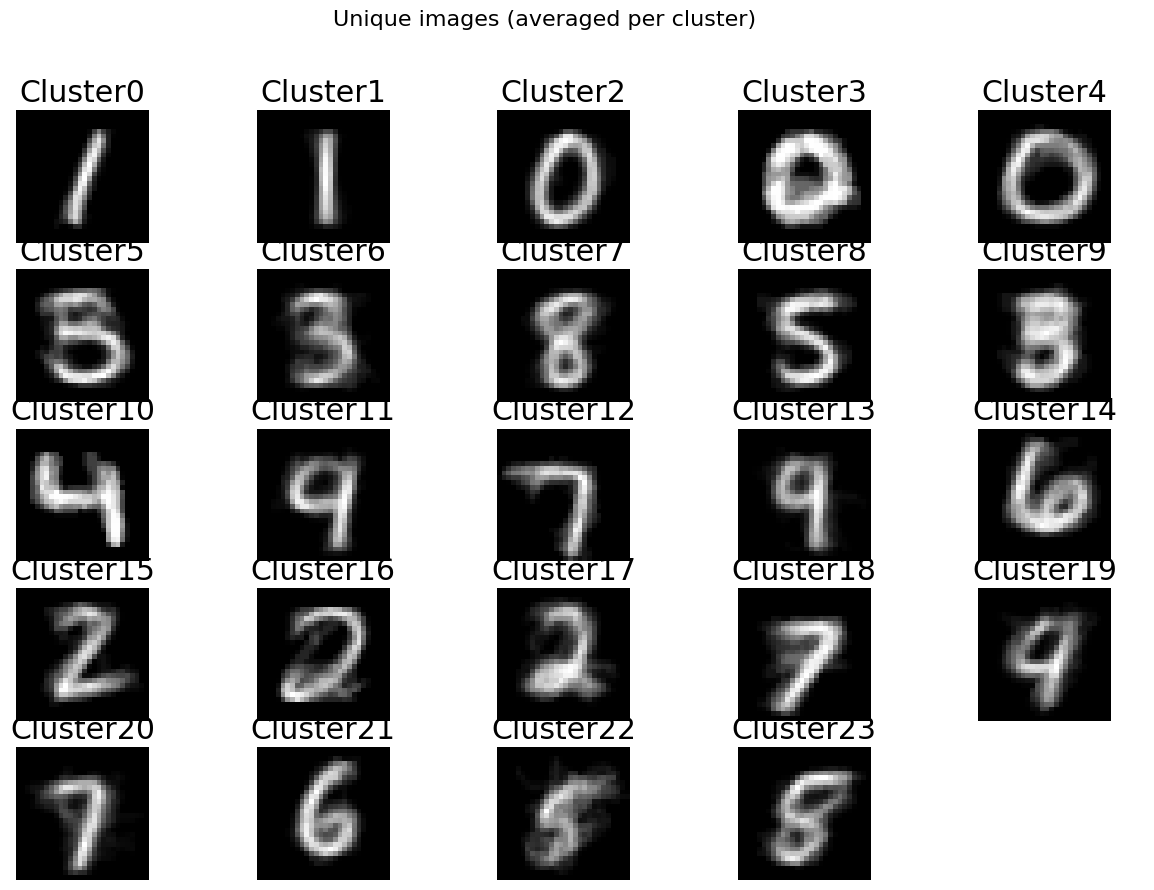

In [710]:
# Get the unique images
unique_samples = cl.unique()
#
print(unique_samples.keys())
# ['labels', 'idx', 'xycoord_center', 'pathnames']
#
# Collect the unique images from the input

print("idx:",unique_samples['idx'])
# X[unique_samples['idx'],:]

# # Plot unique images.
cl.plot_unique()

[clustimage] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


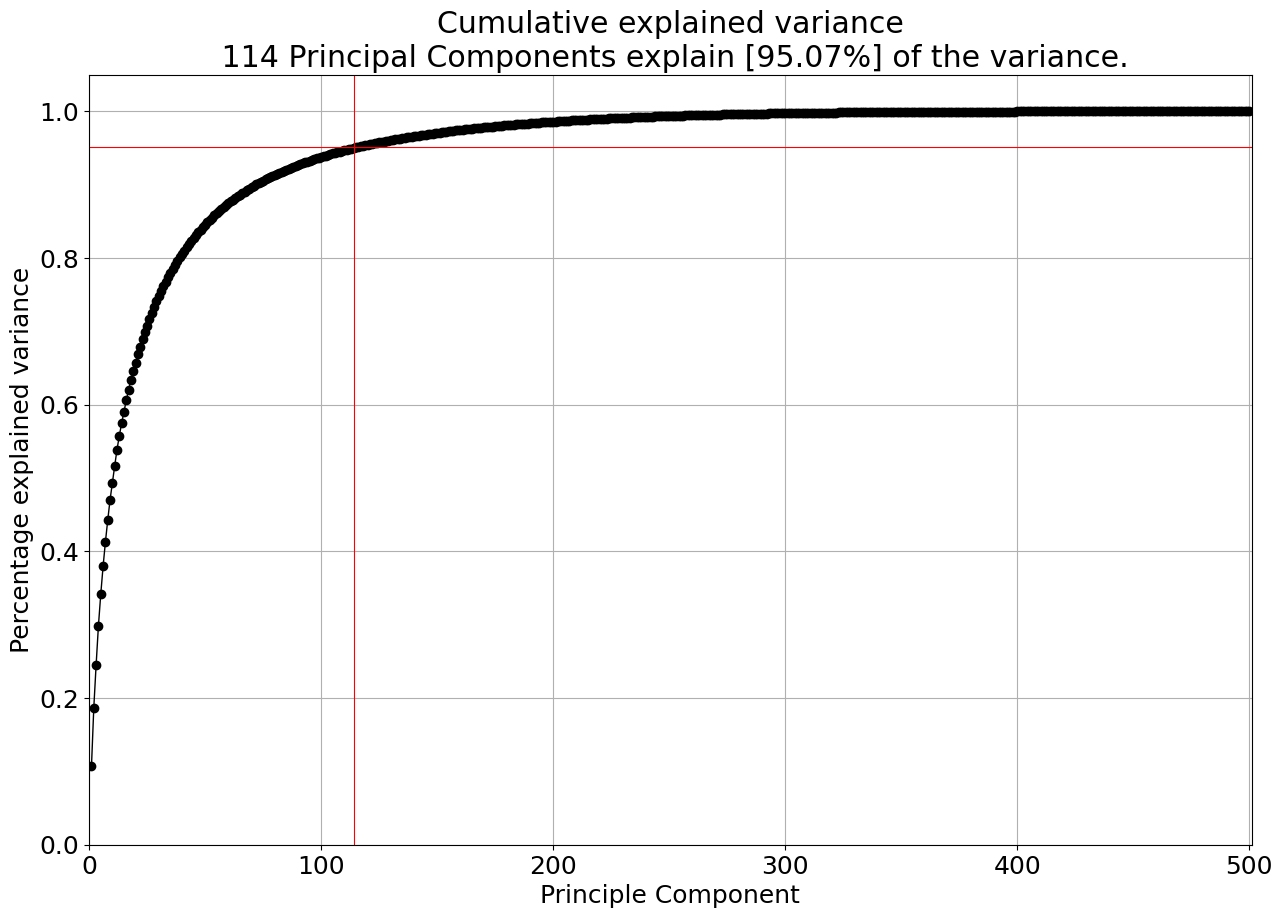

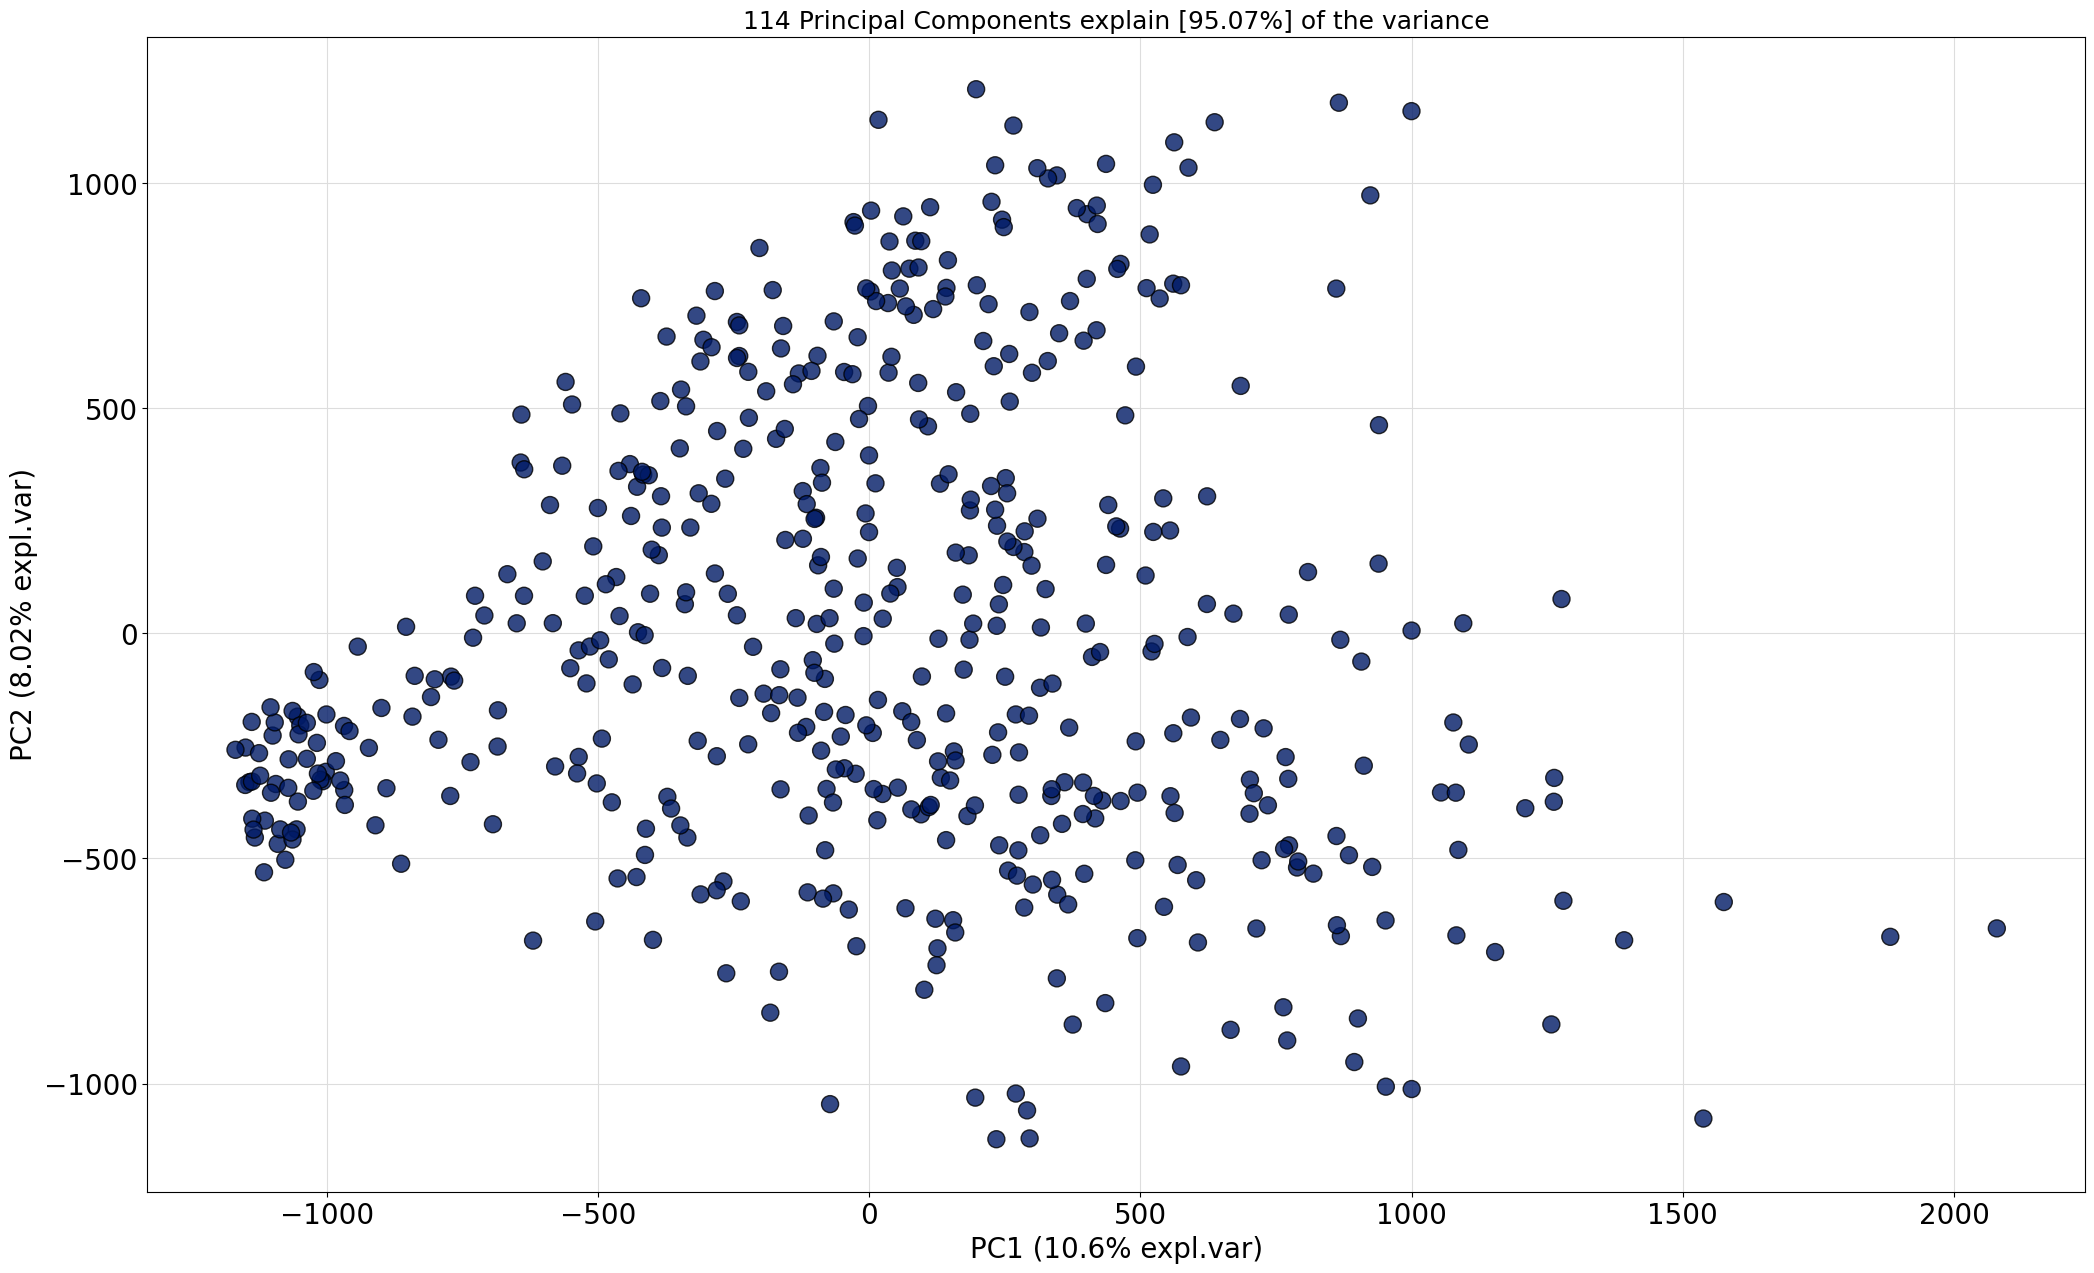

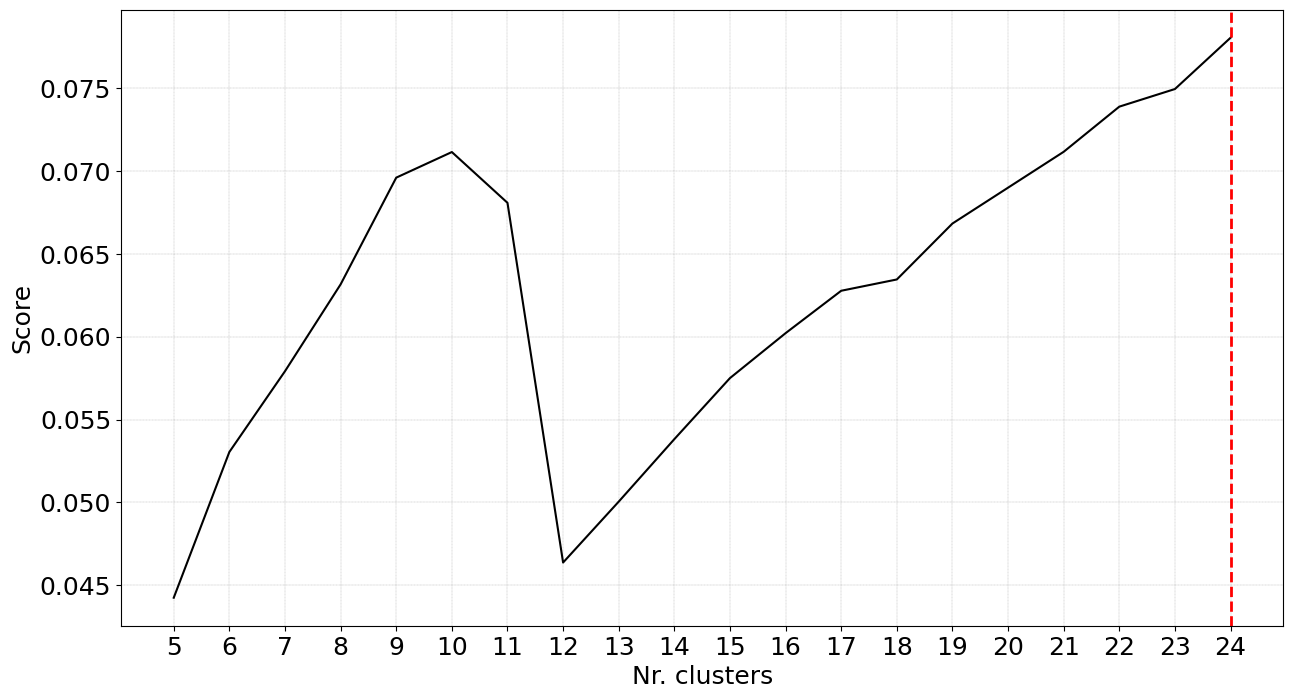

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [711]:
# Plot the explained variance
cl.pca.plot()
# Make scatter plot of PC1 vs PC2
cl.pca.scatter(legend=False, label=False)
# Plot the evaluation of the number of clusters
cl.clusteval.plot()

[clustimage] >INFO> Coordinates (x, y) are set based on the first two features.
[clustimage] >INFO> Set alpha based on density because of the parameter: [opaque]
[clustimage] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

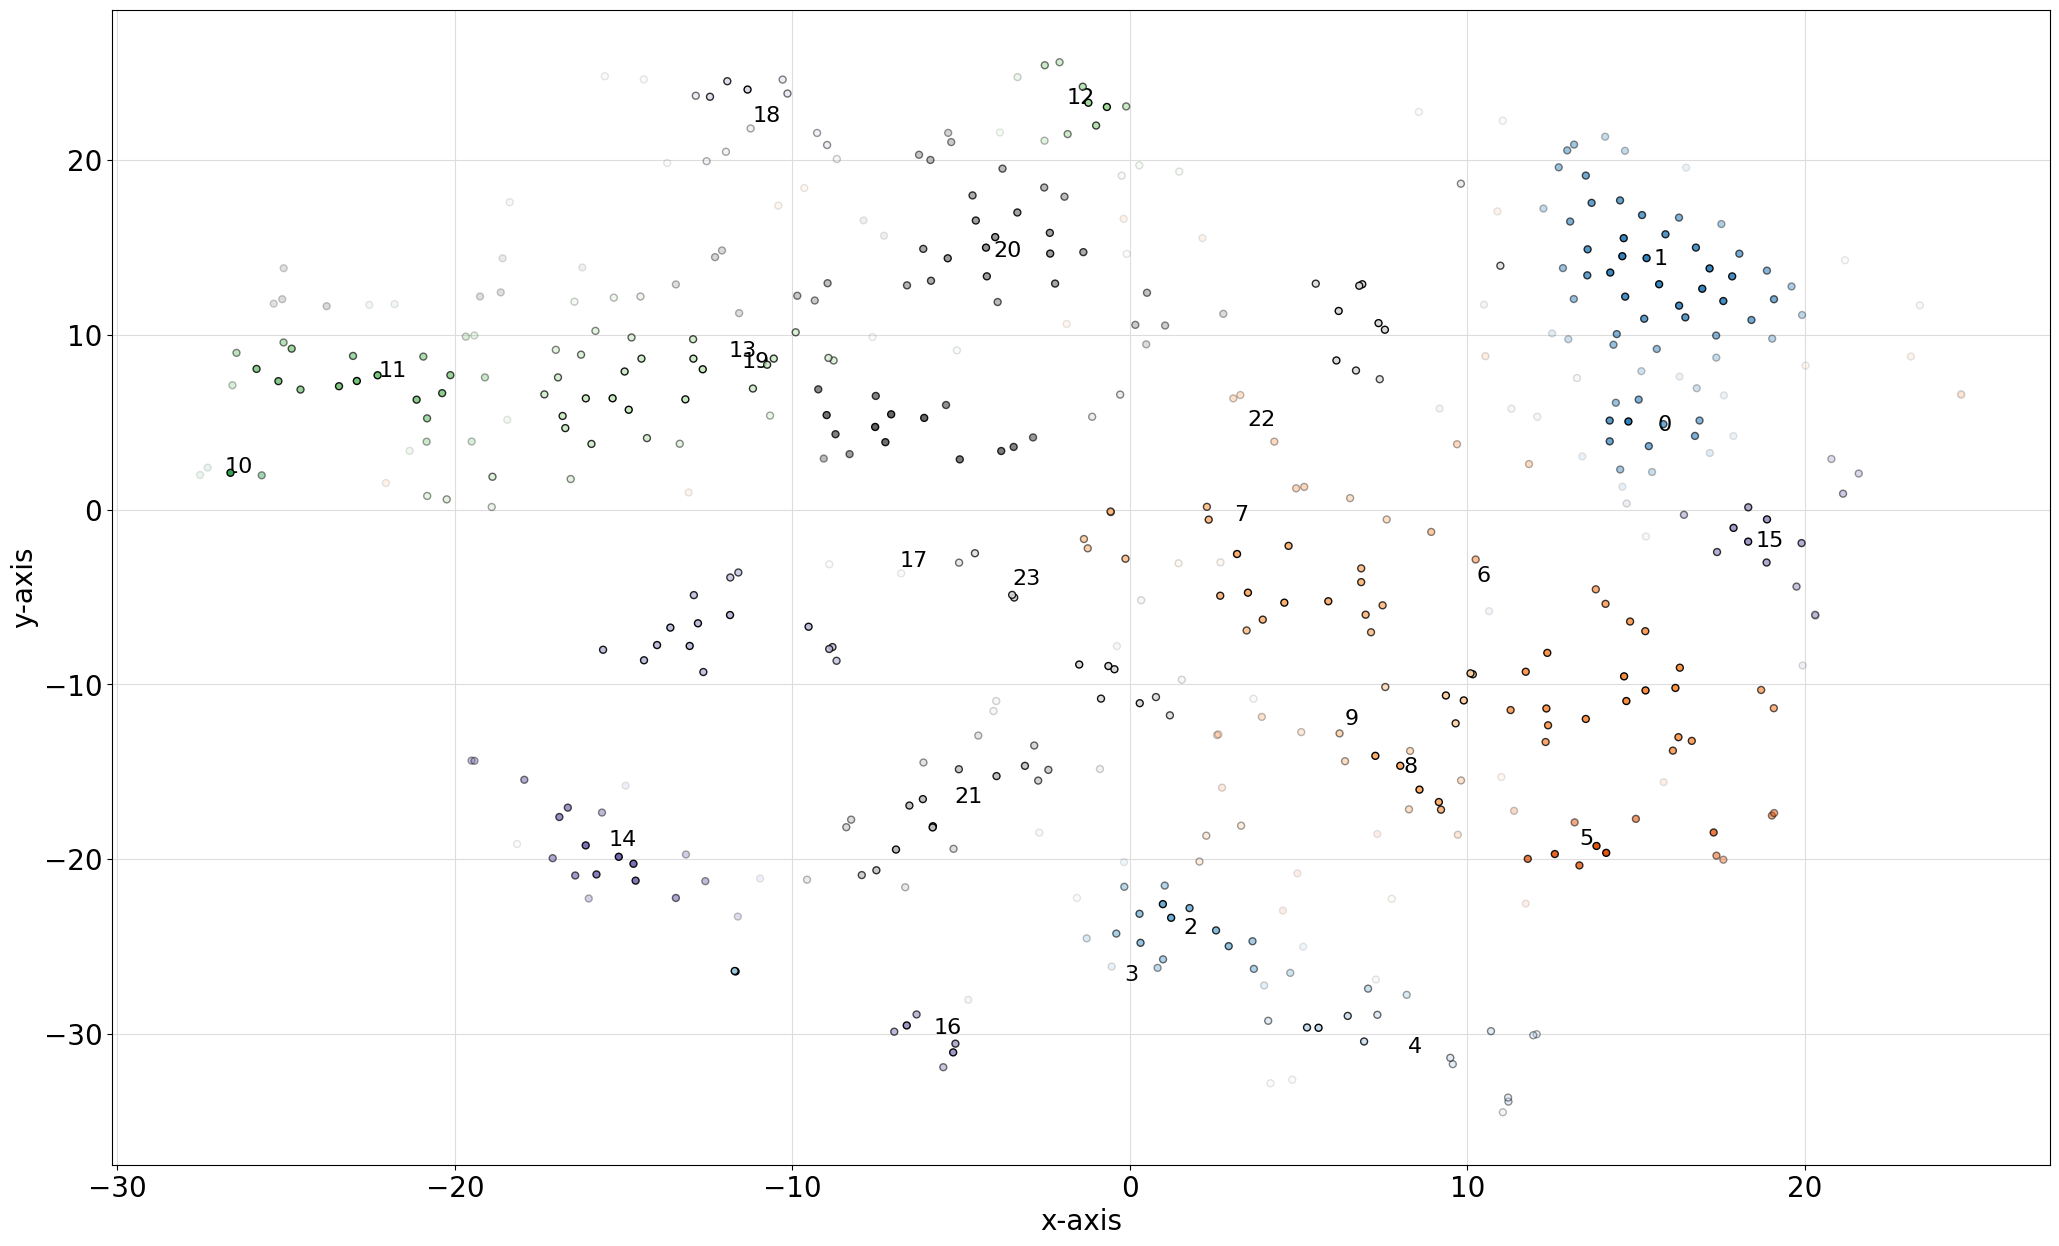

In [712]:
# Make silhouette plot
cl.clusteval.scatter(cl.results['xycoord'])

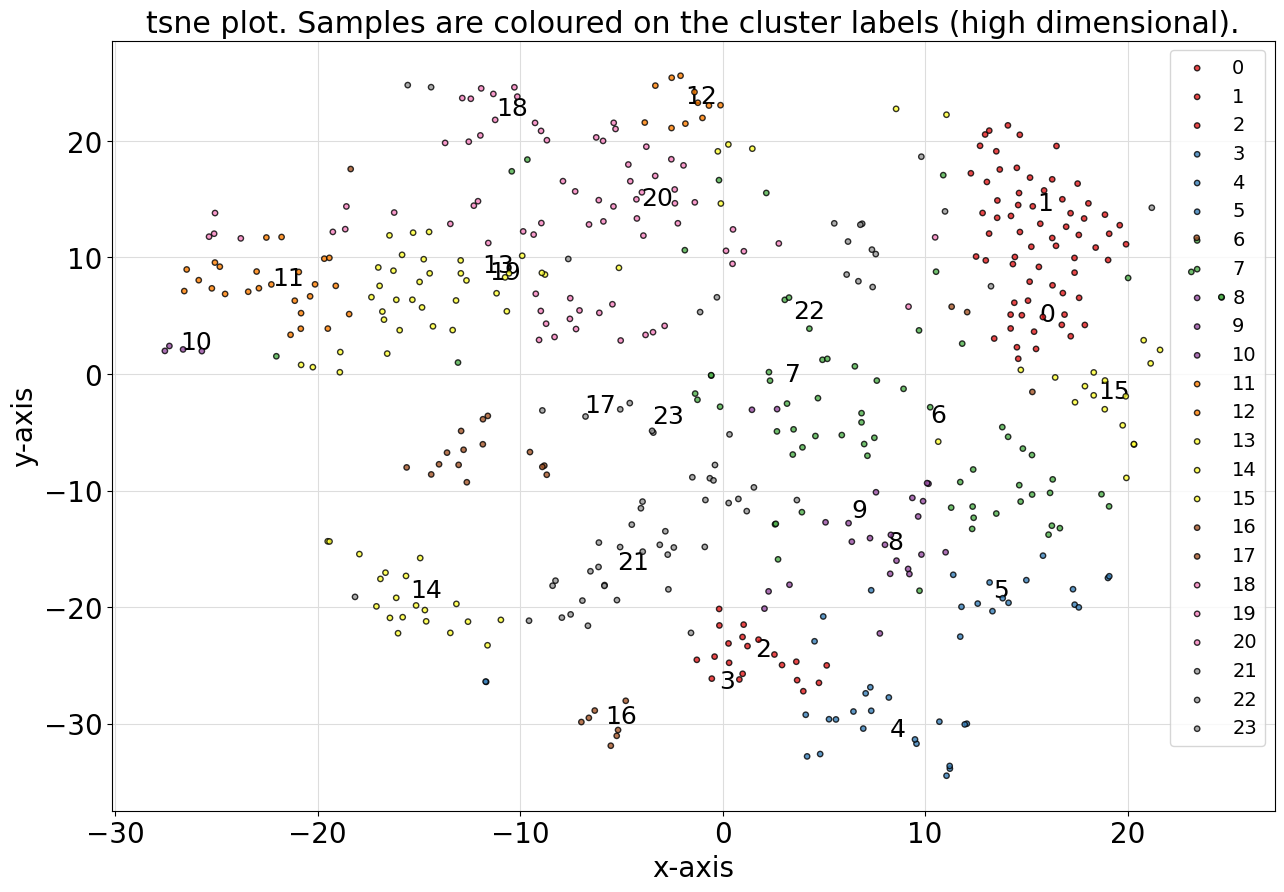

<Figure size 640x480 with 0 Axes>

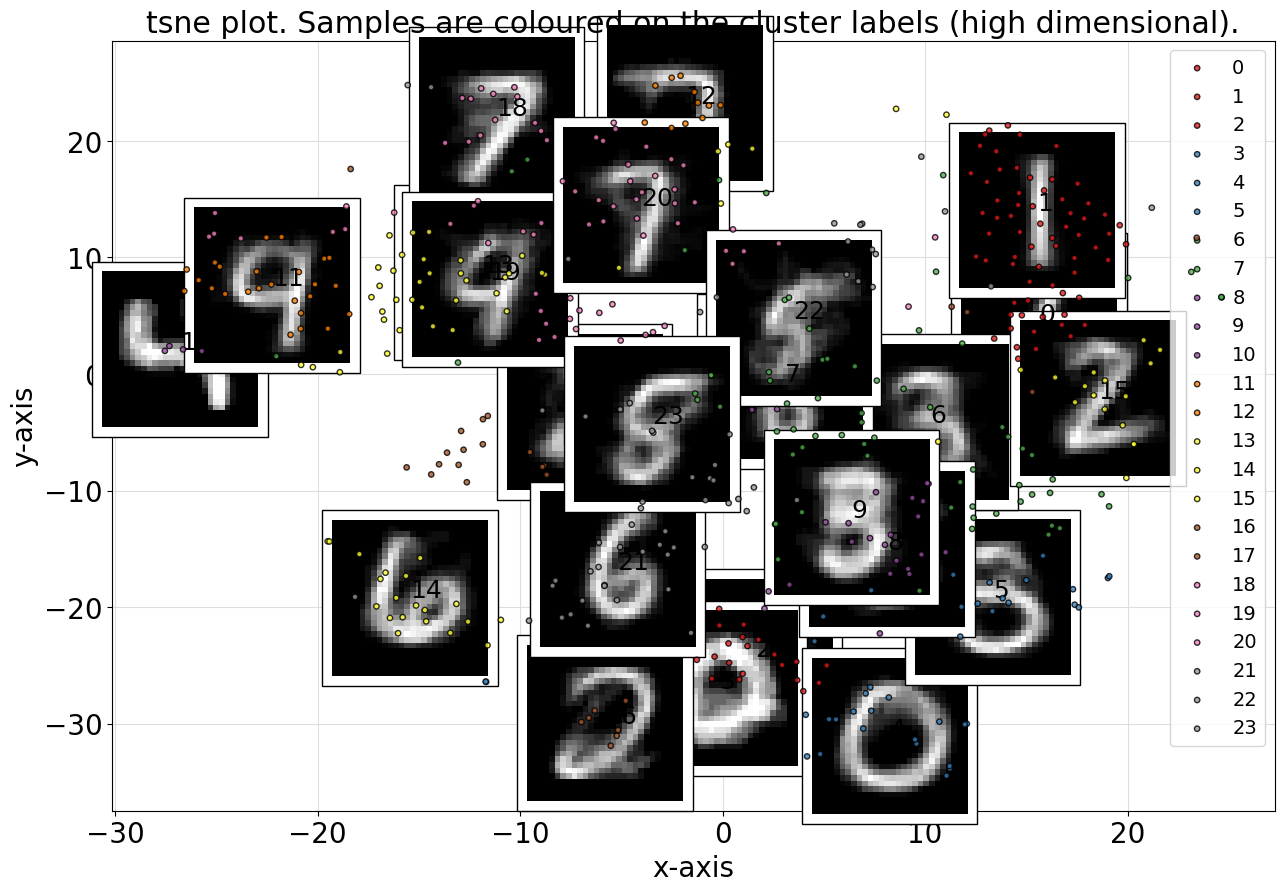

<Figure size 640x480 with 0 Axes>

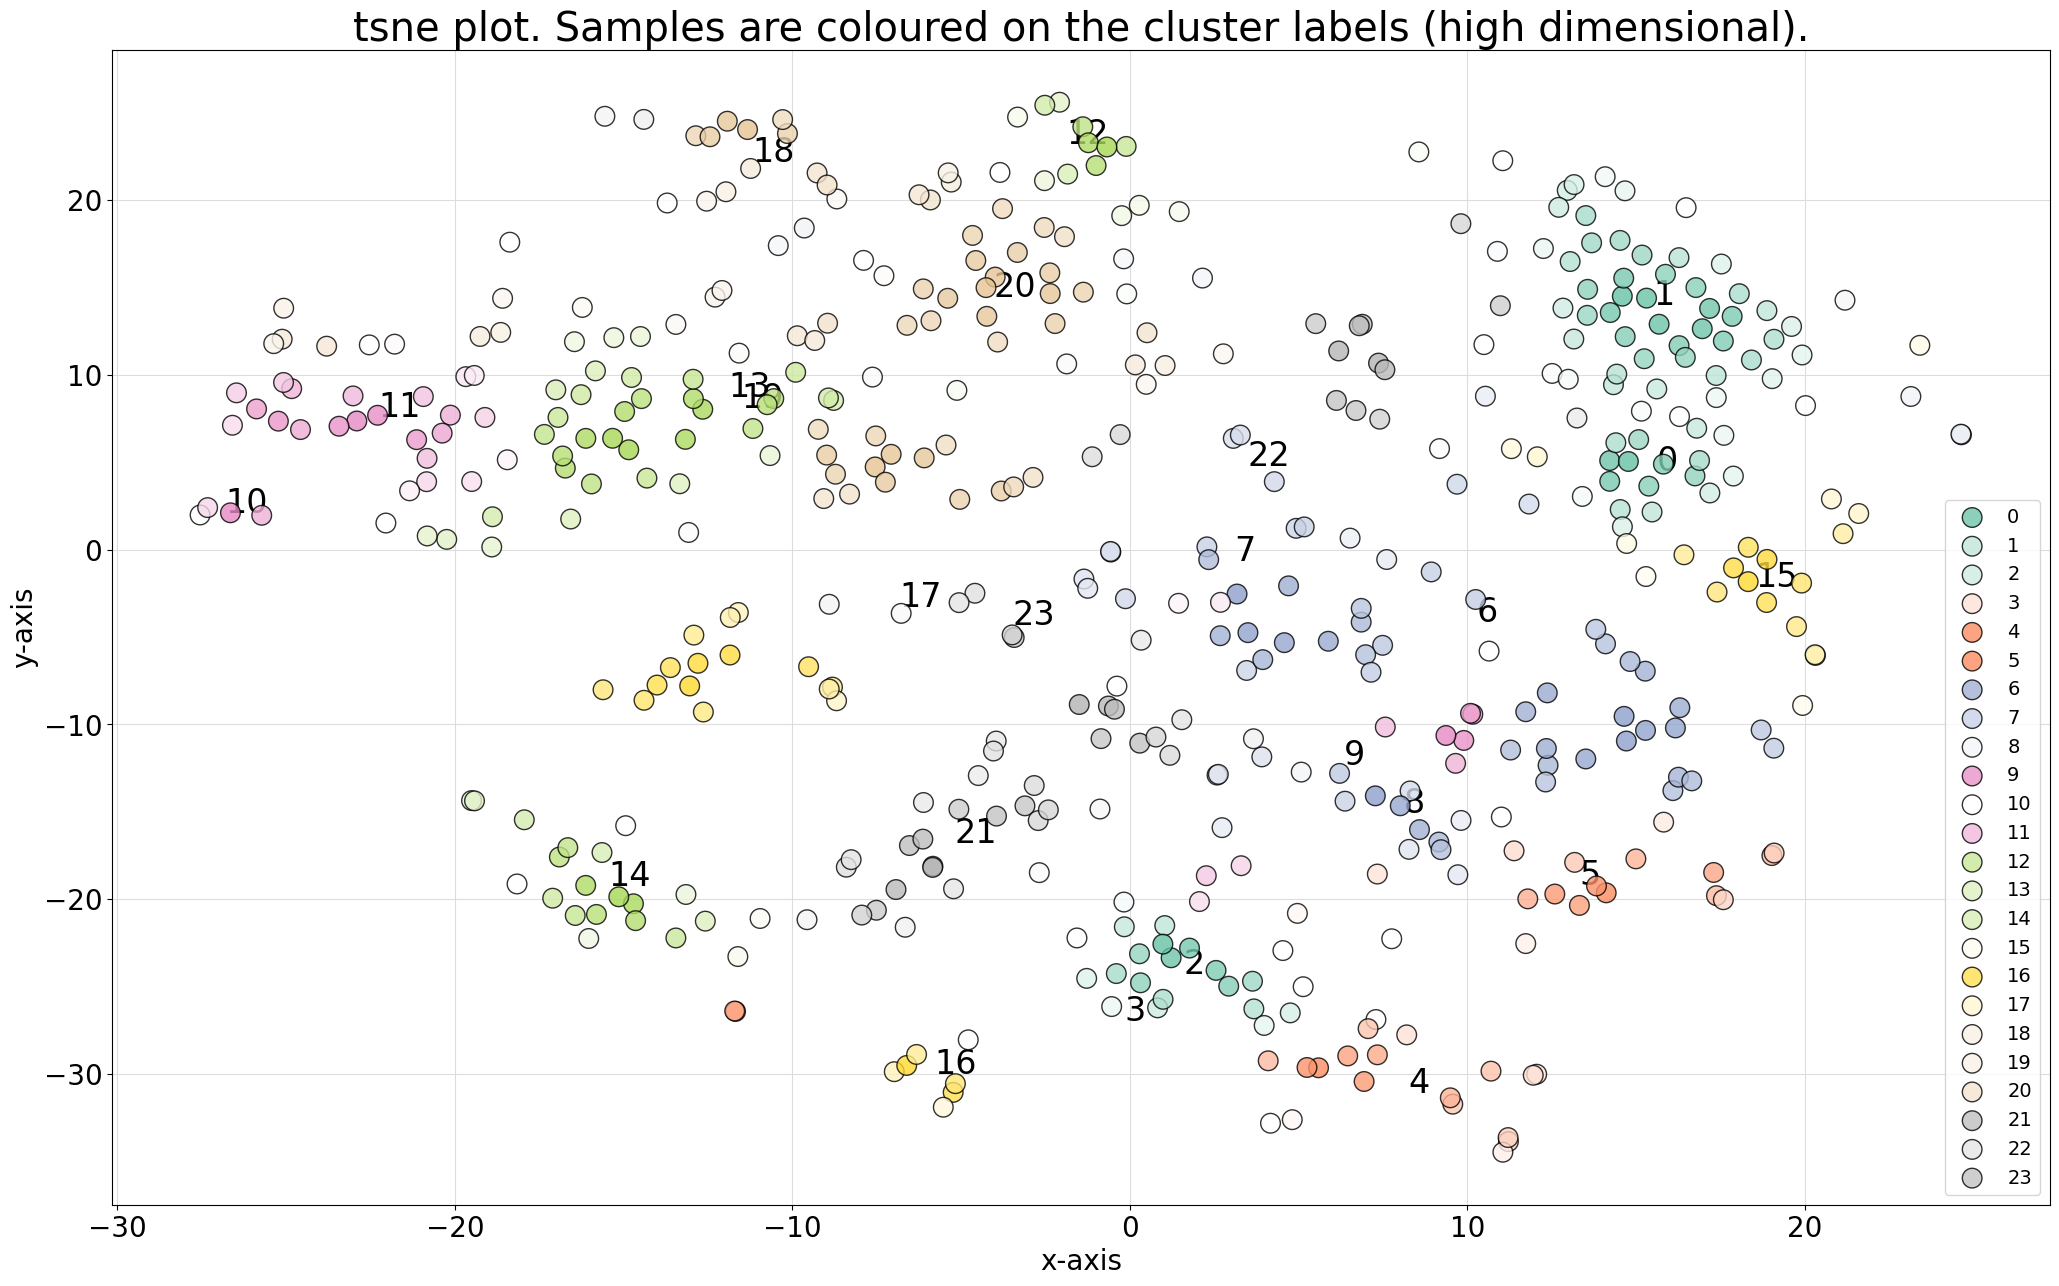

(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [713]:
# Make scatterplot
cl.scatter(zoom=None)

# Plot the image that is in the center of the cluster
cl.scatter(zoom=4)

# Lets change some more arguments to make a pretty scatterplot
cl.scatter(zoom=None, dotsize=200, figsize=(25, 15), args_scatter={'fontsize':24, 'gradient':'#FFFFFF', 'cmap':'Set2', 'legend':True})


In [714]:
cl.scatter(zoom=8, plt_all=True, figsize=(150,100))

(<Figure size 15000x10000 with 1 Axes>,
 <Axes: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

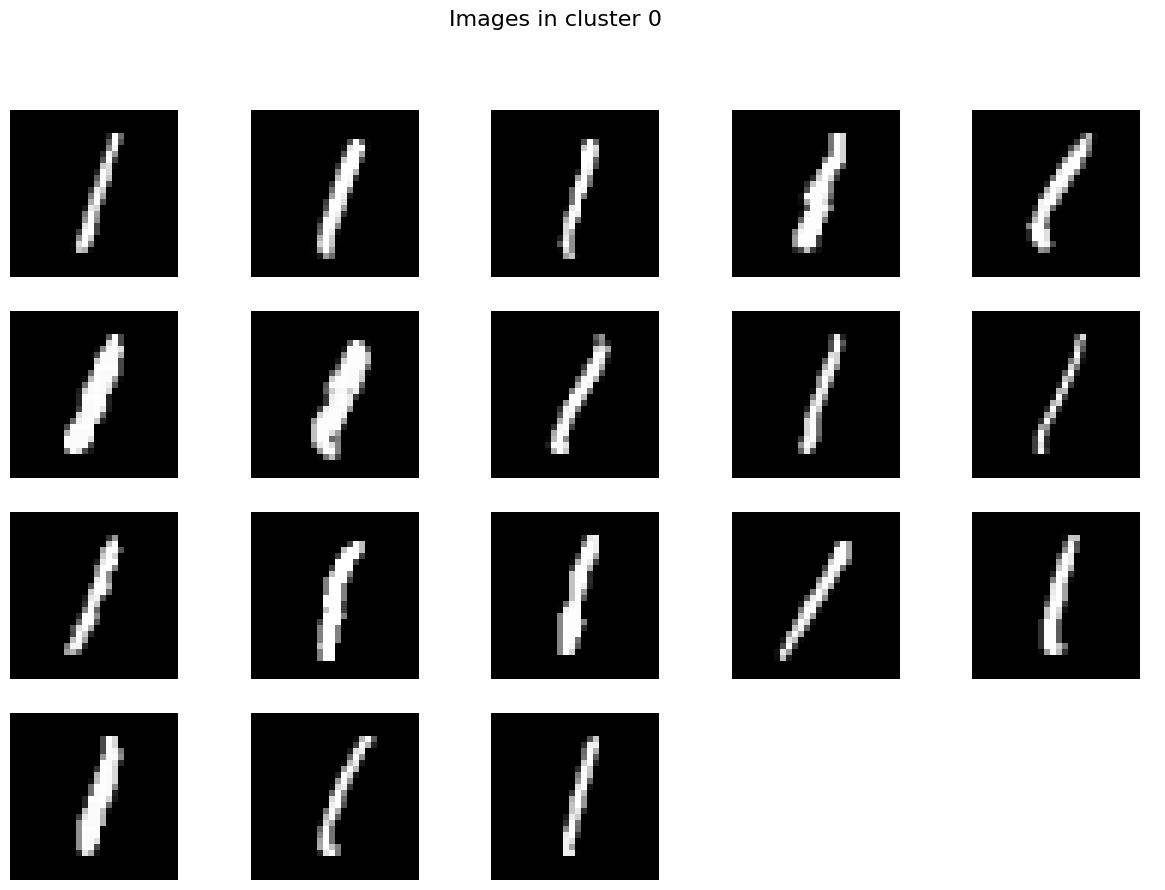

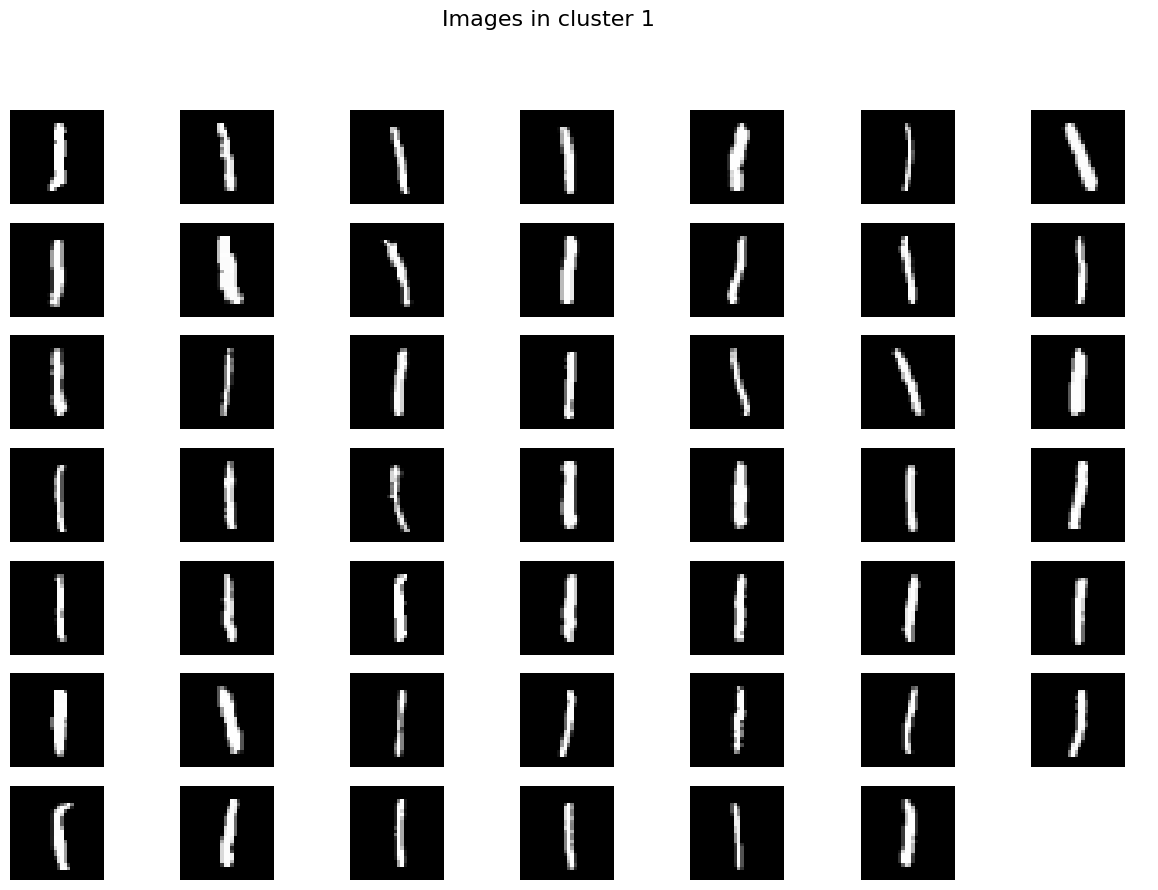

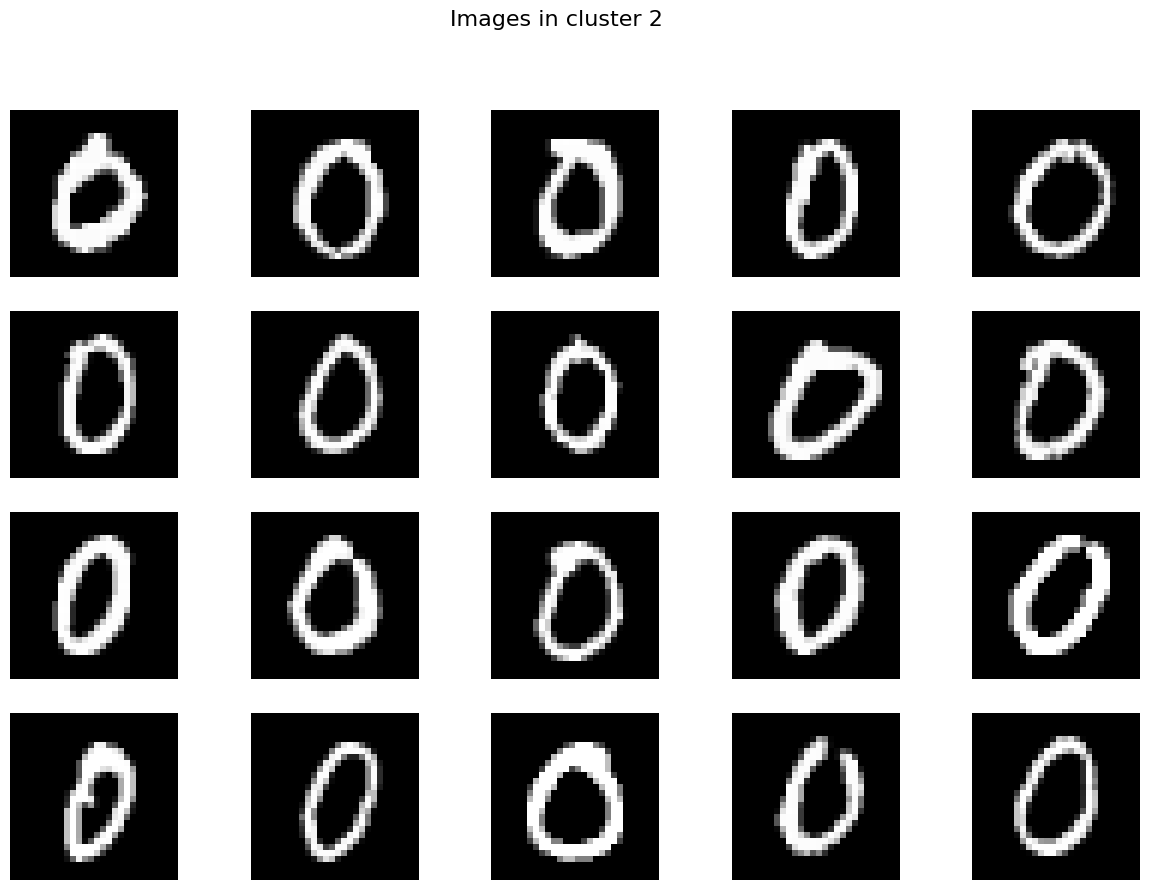

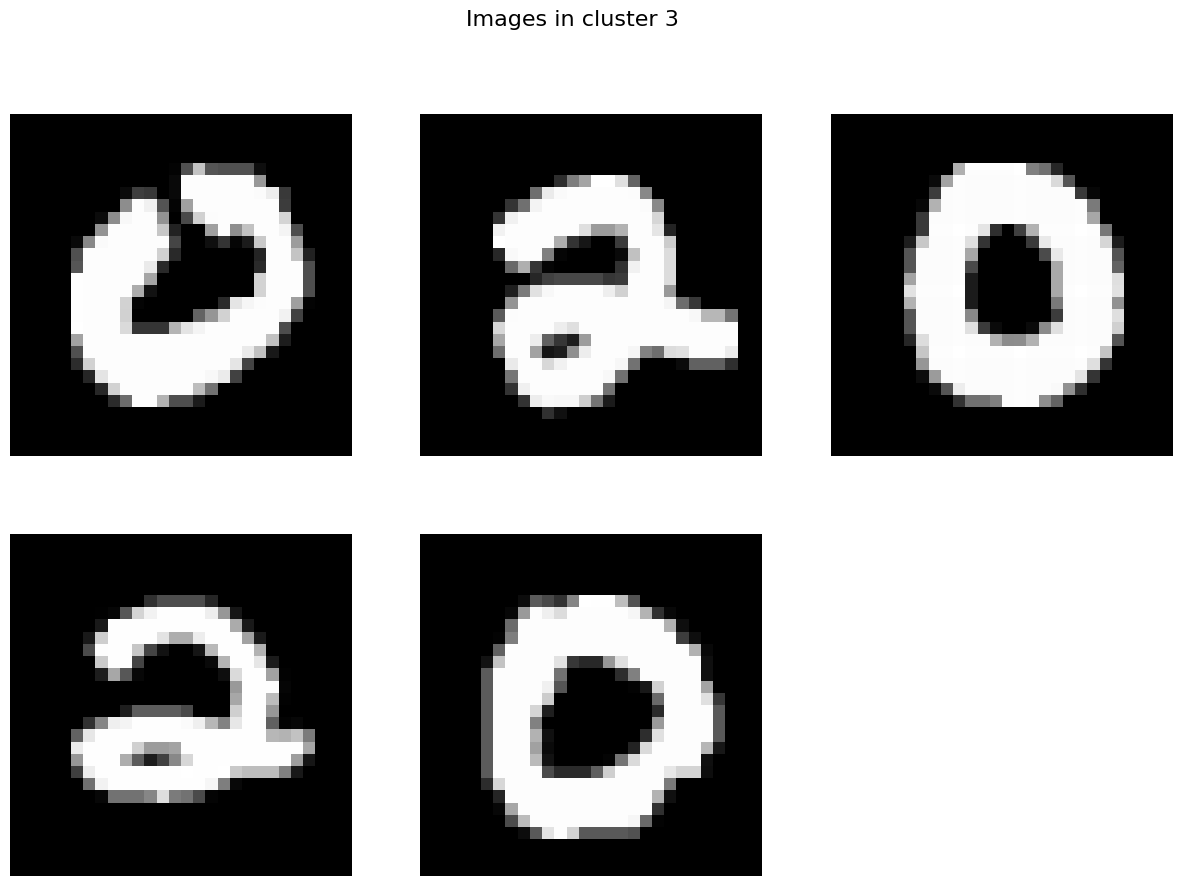

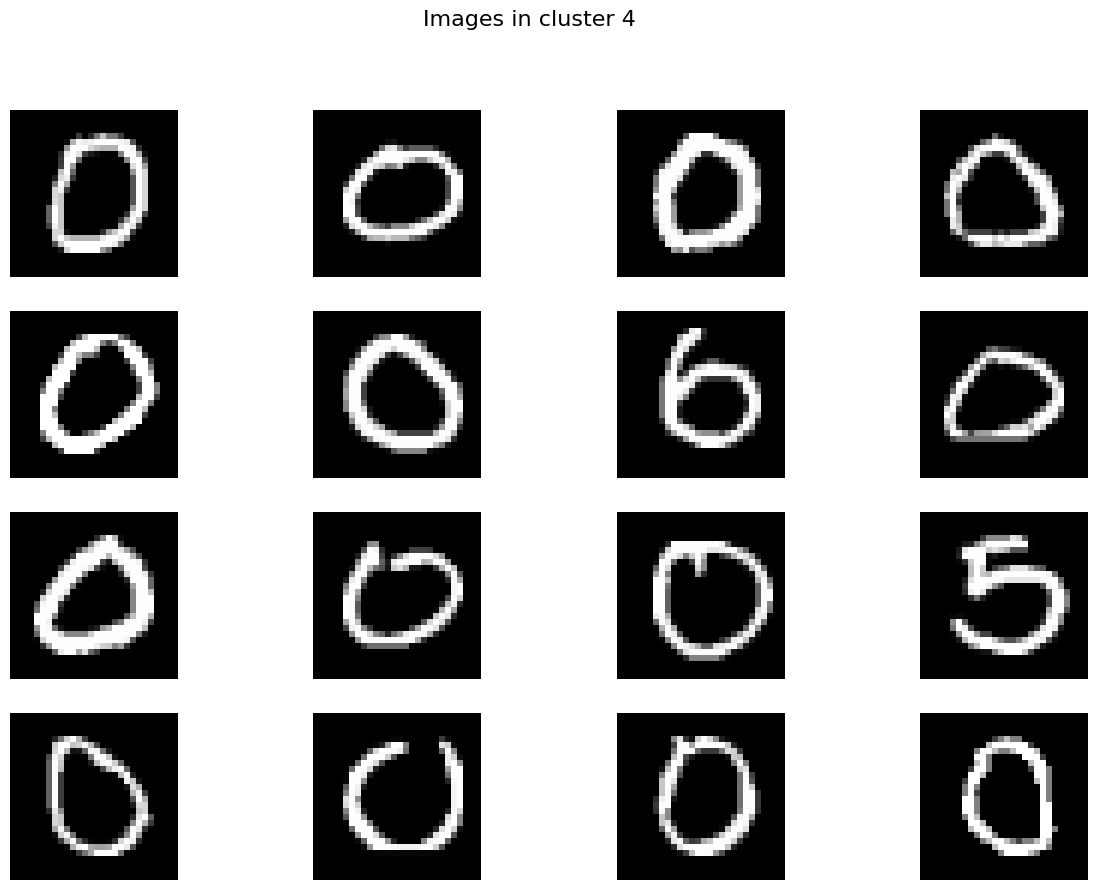

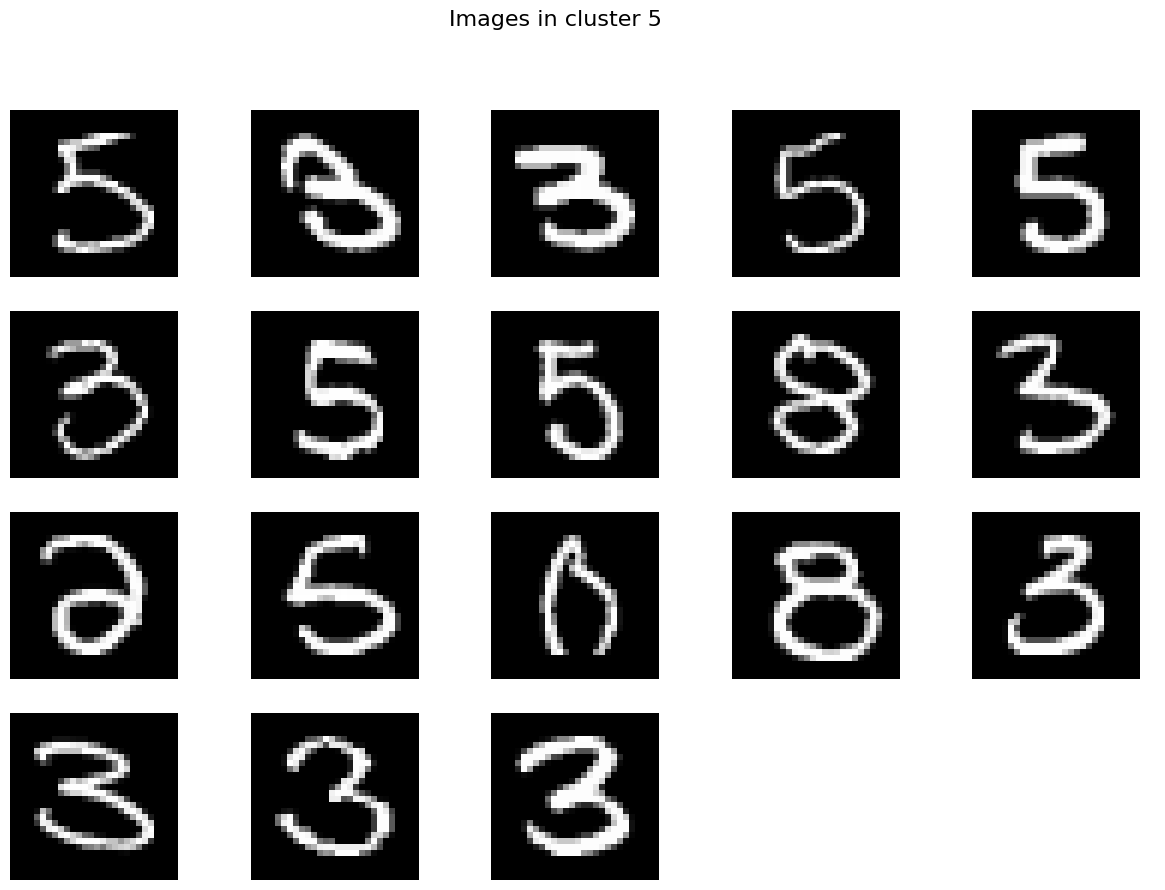

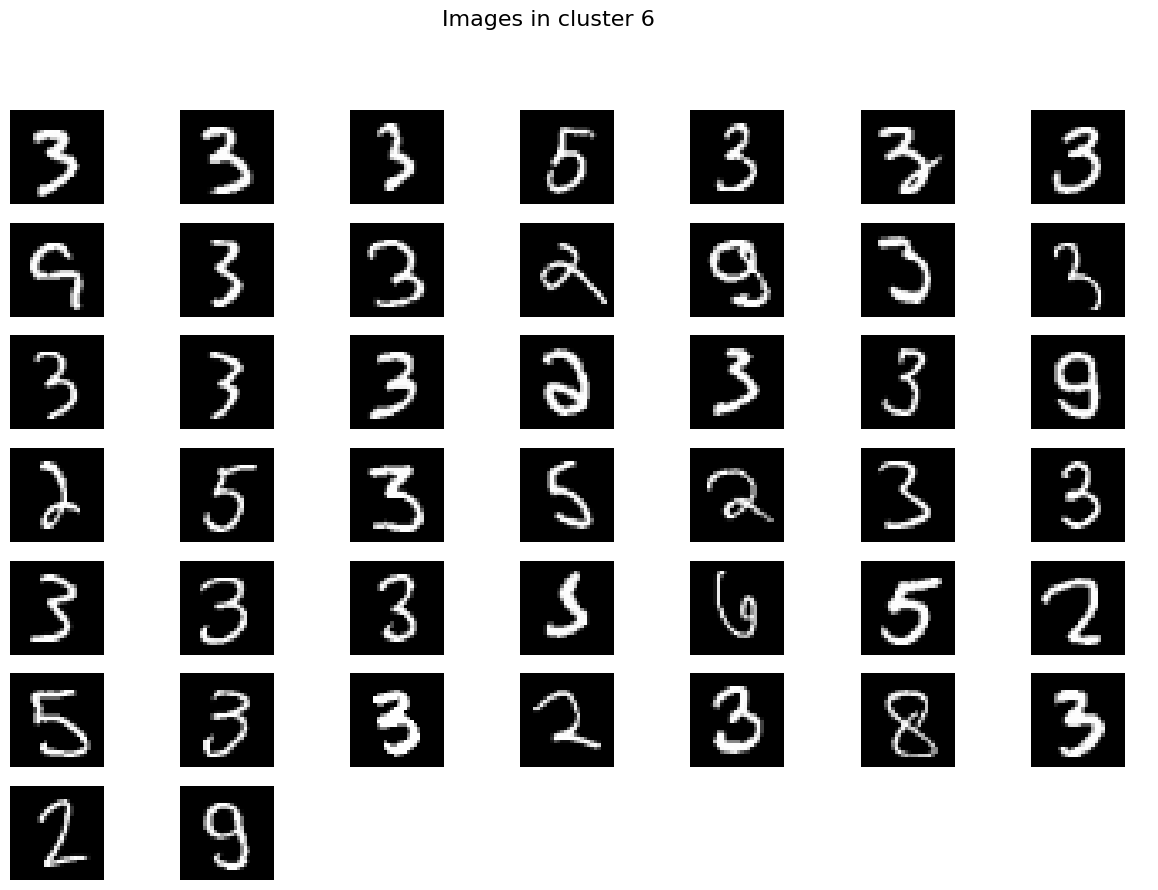

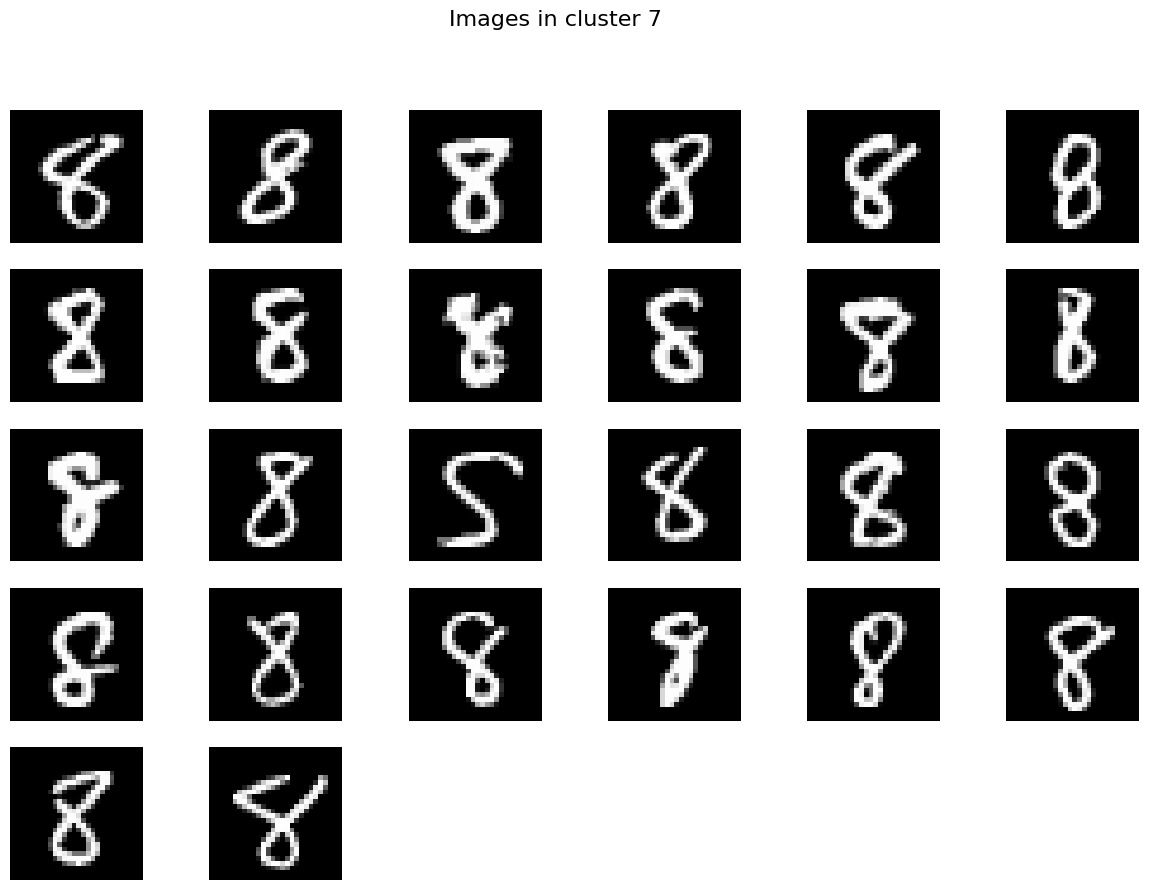

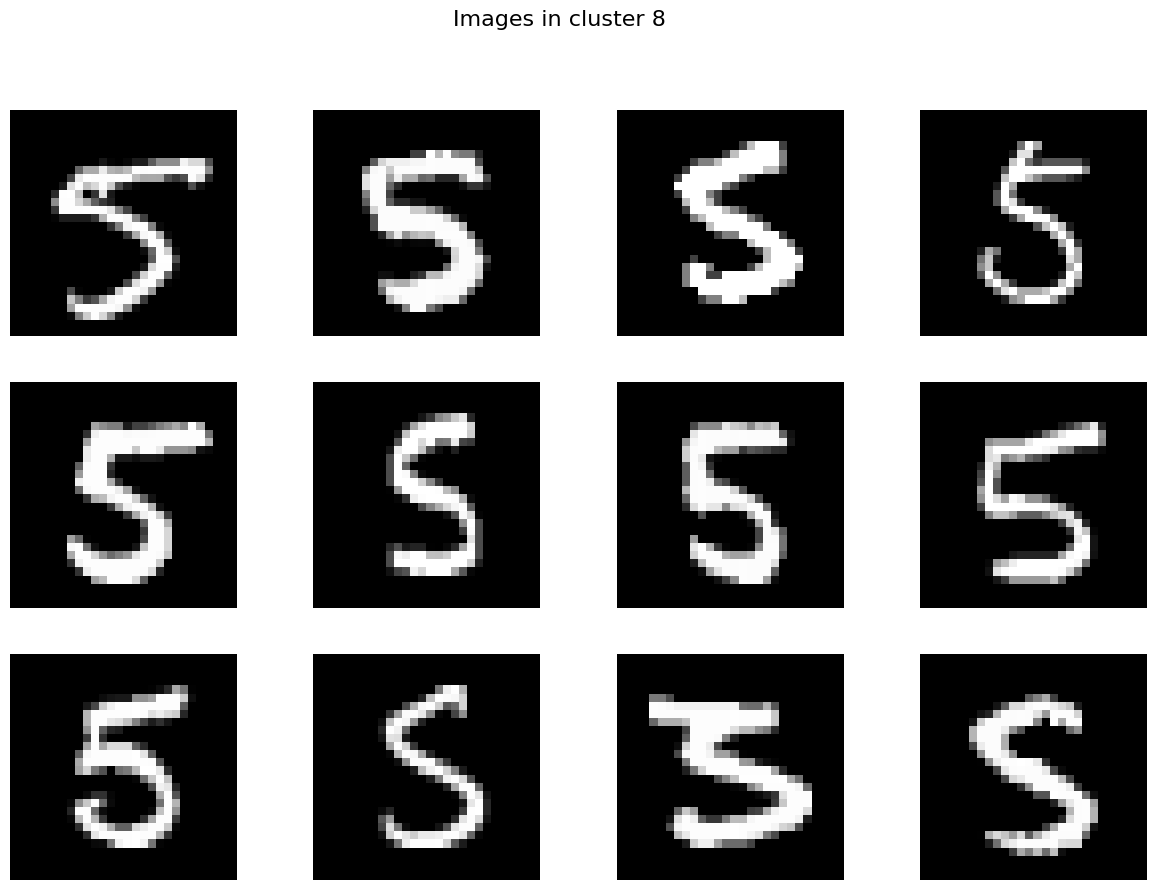

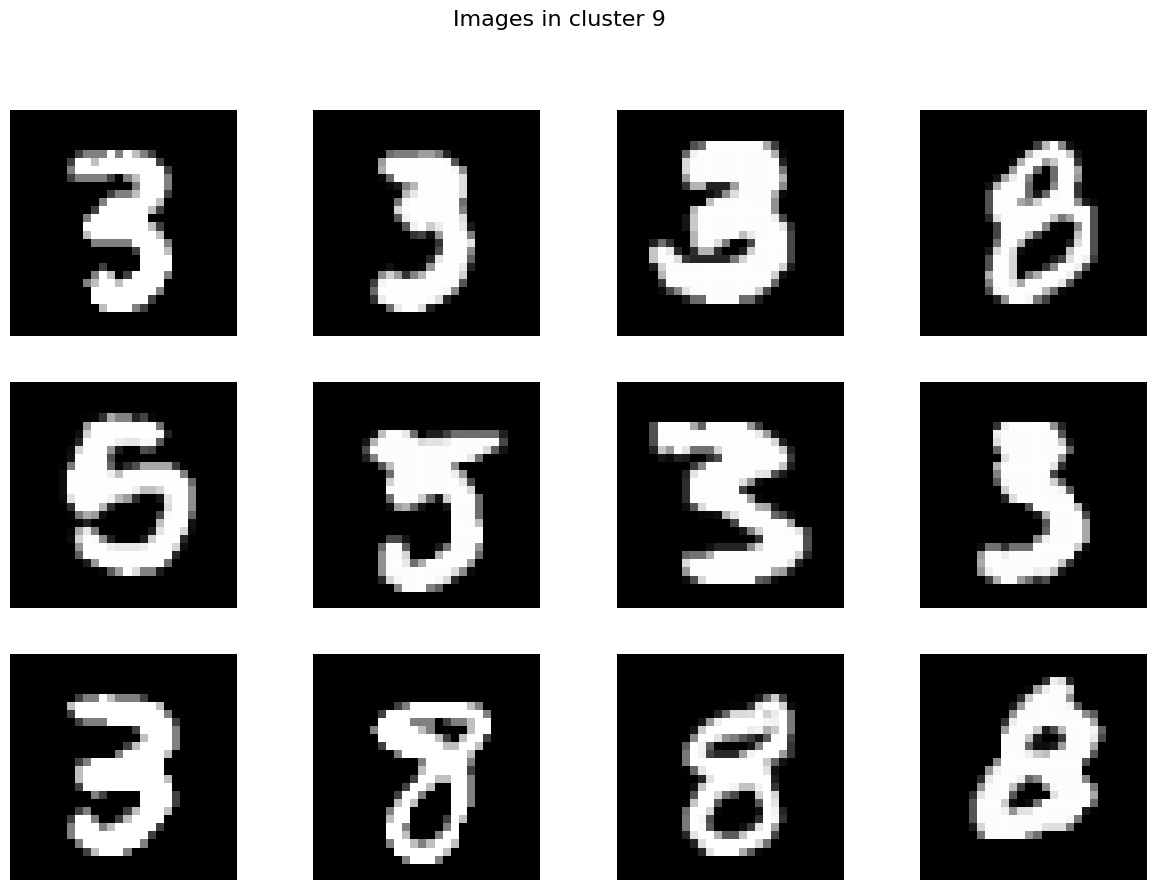

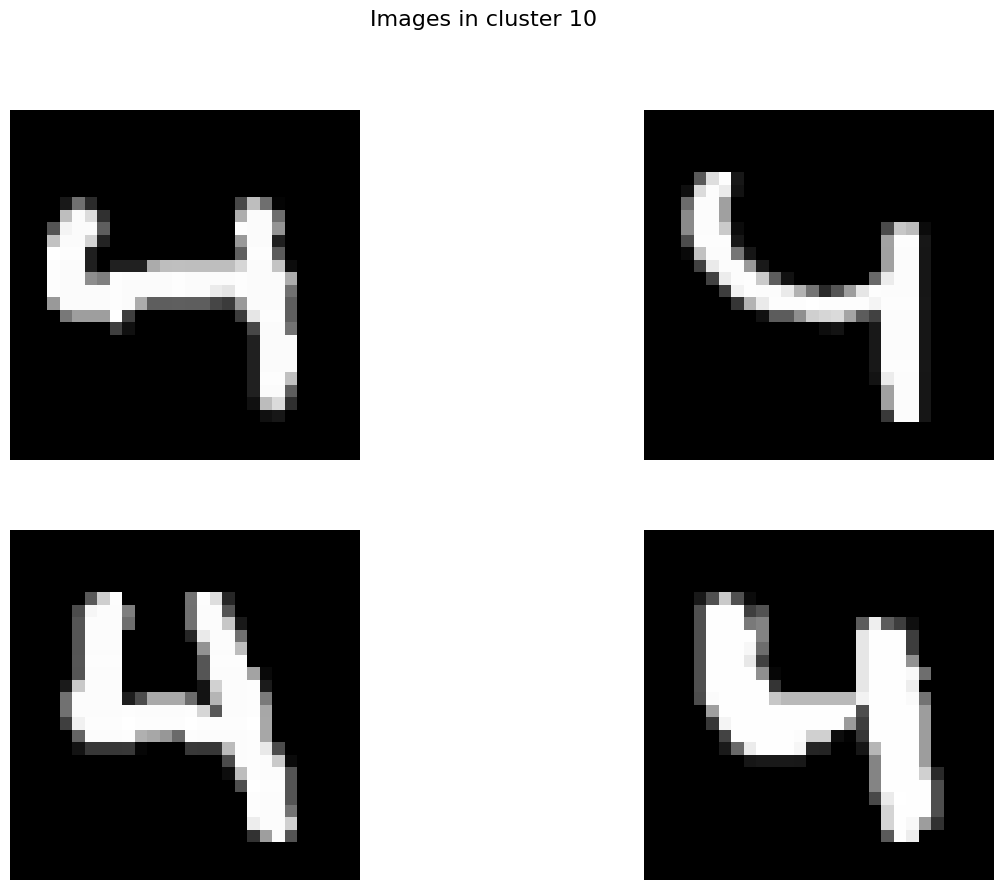

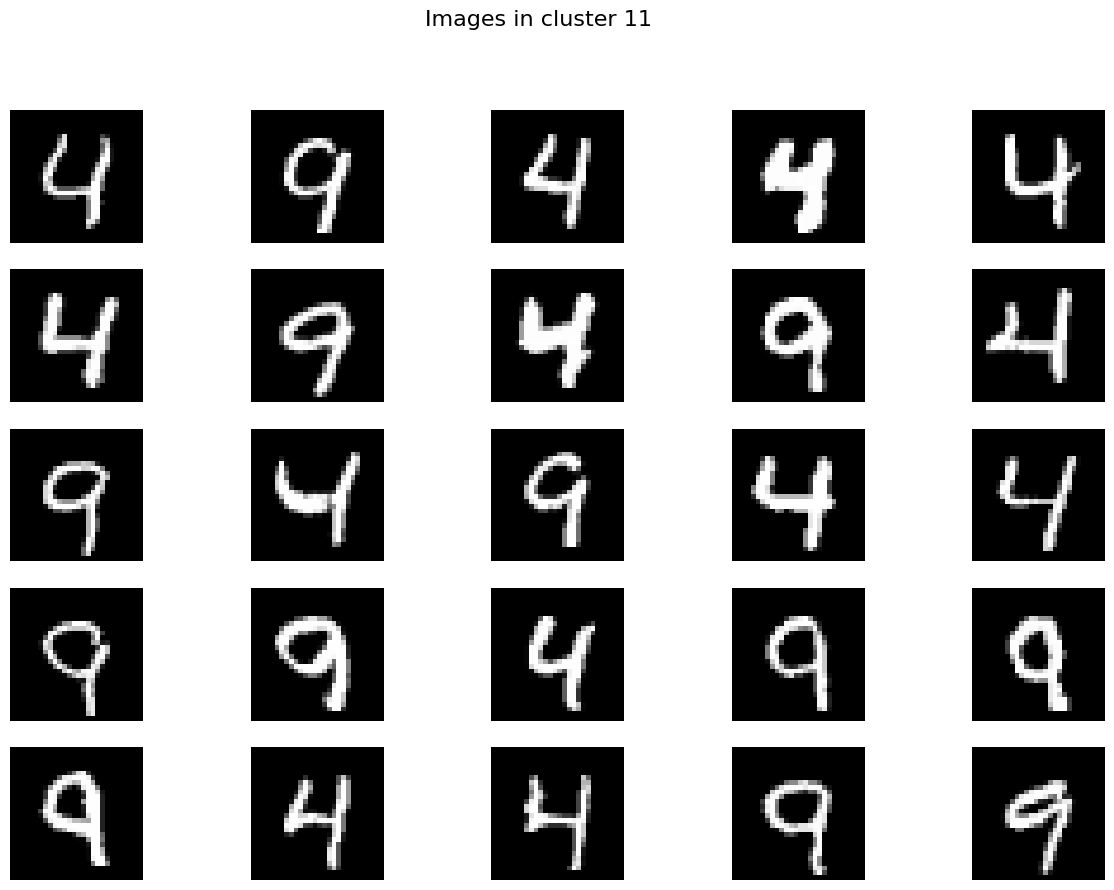

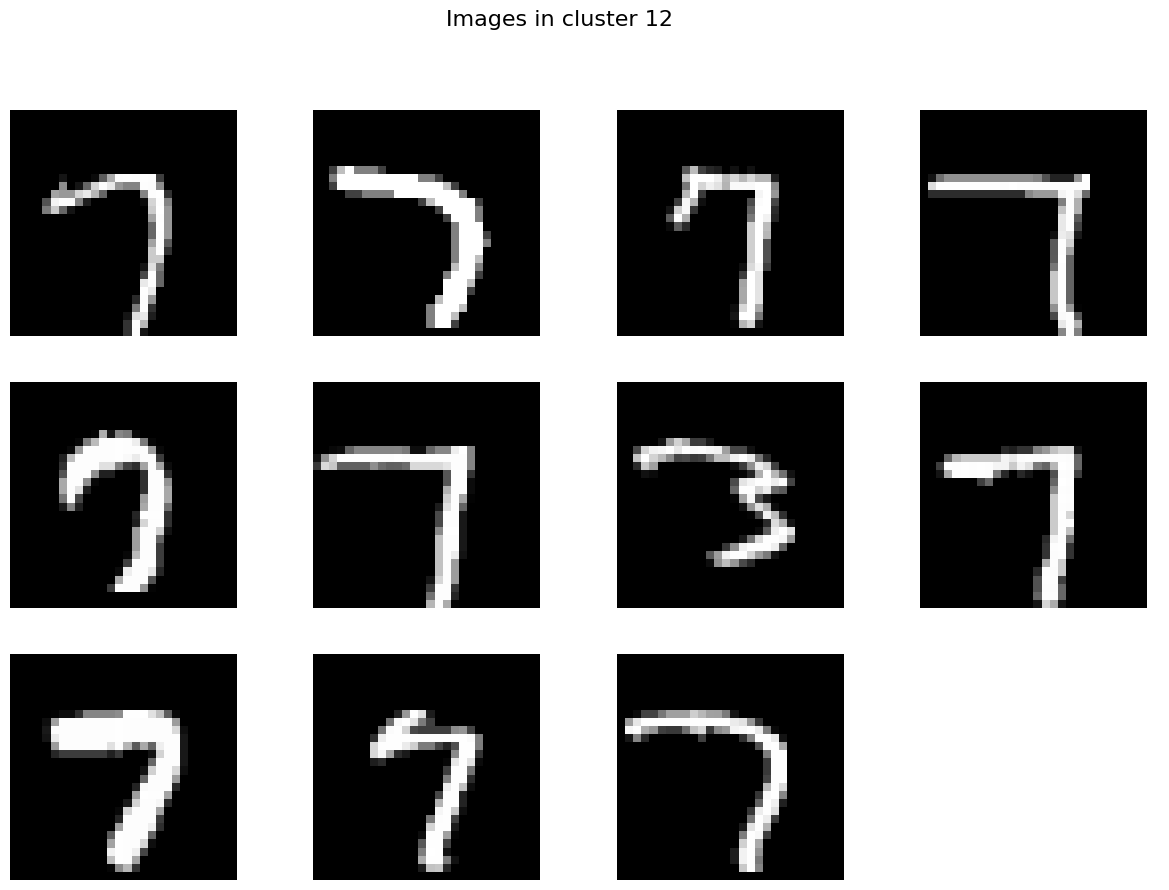

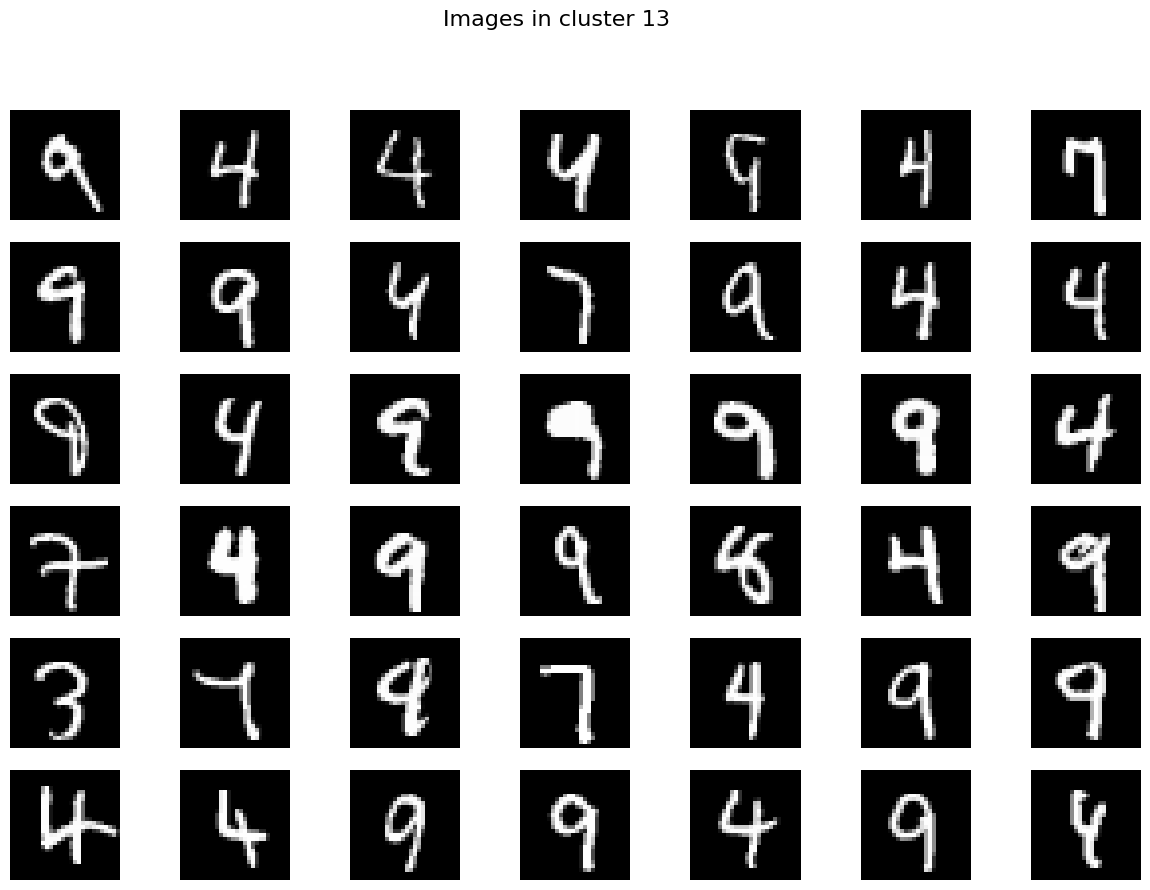

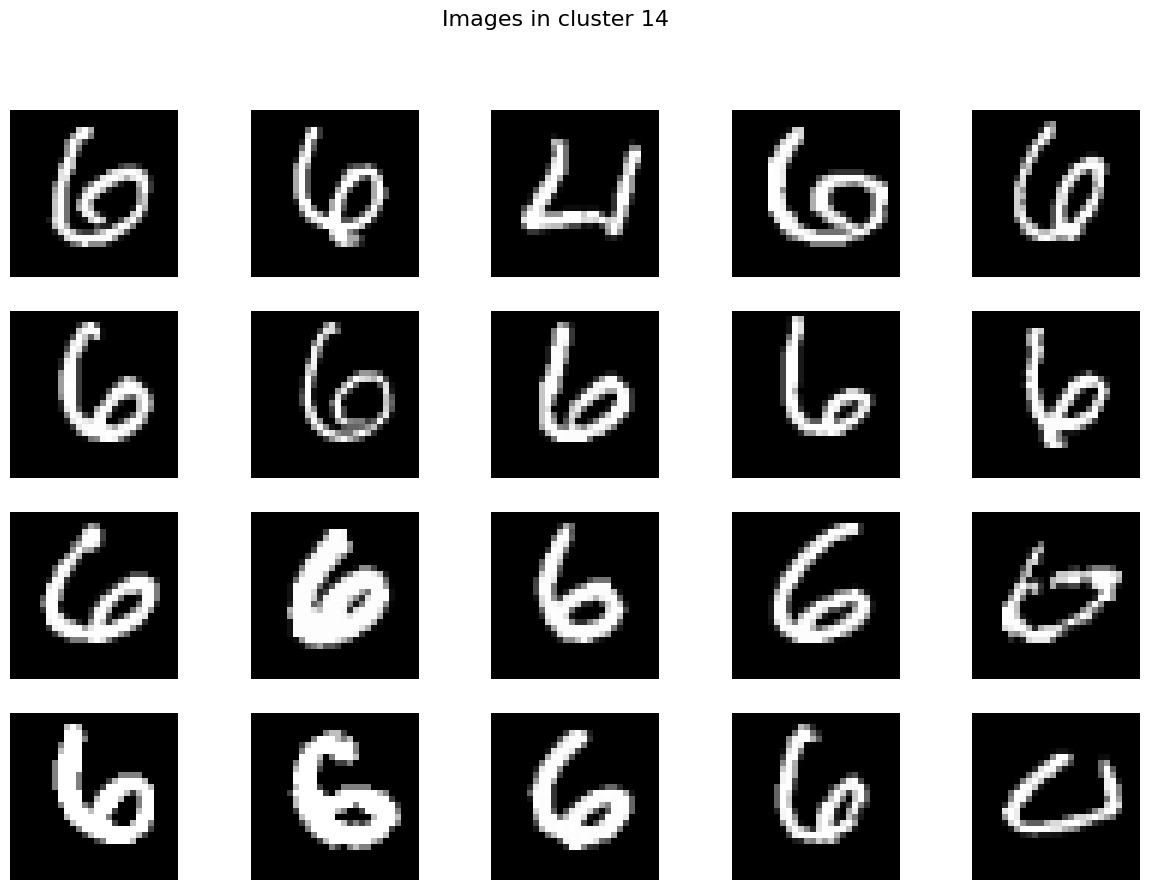

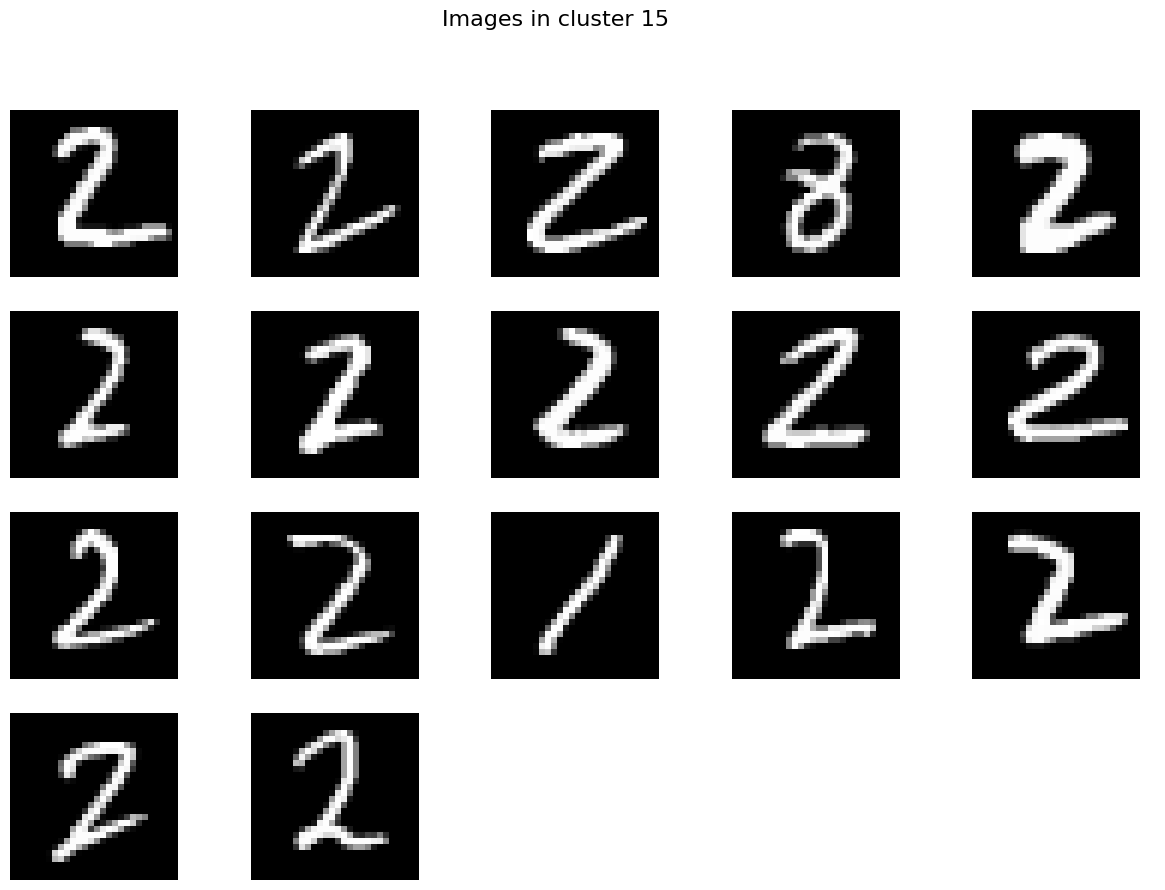

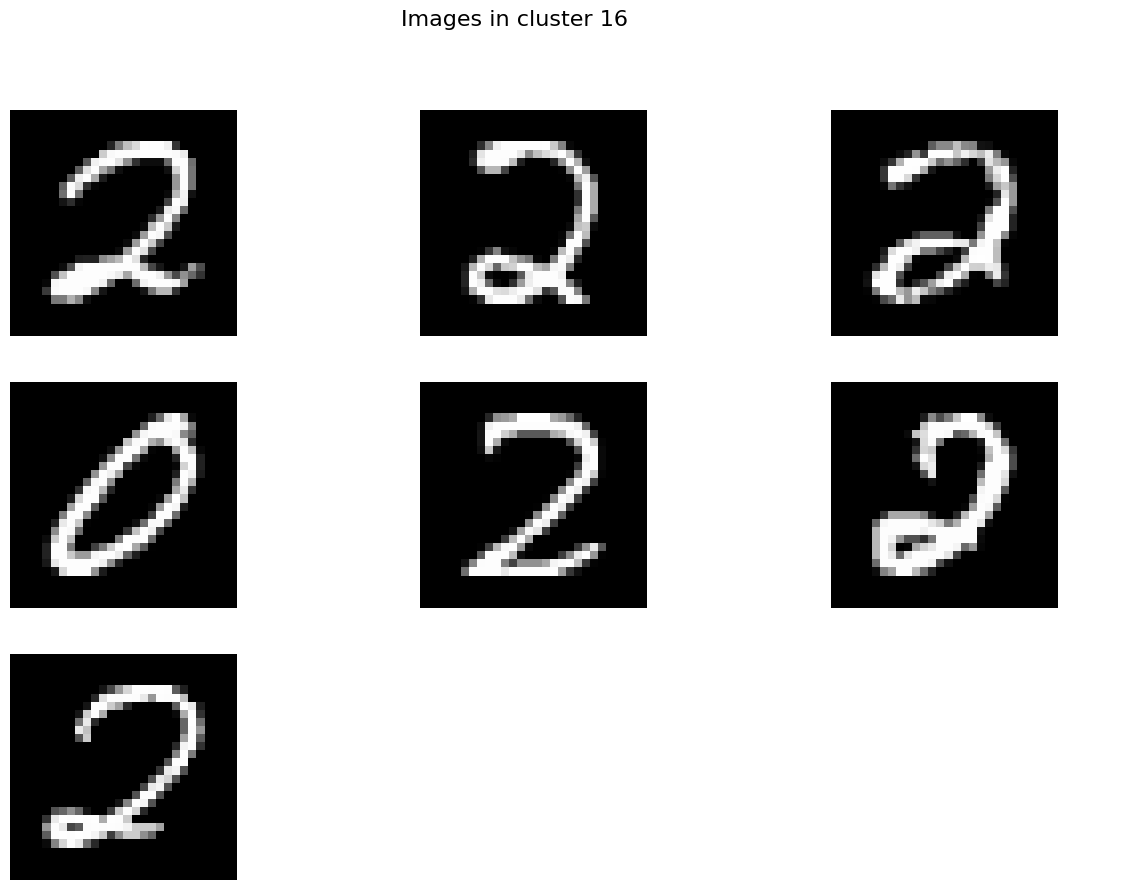

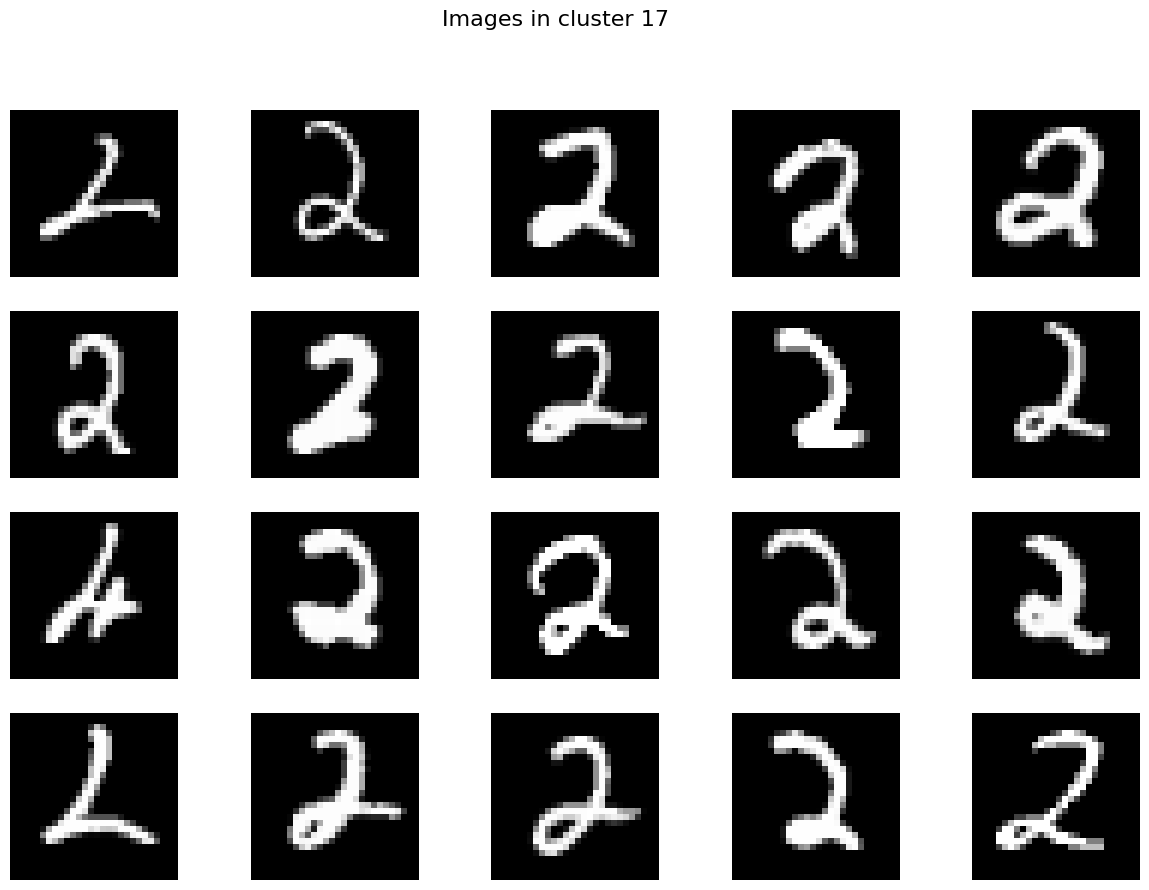

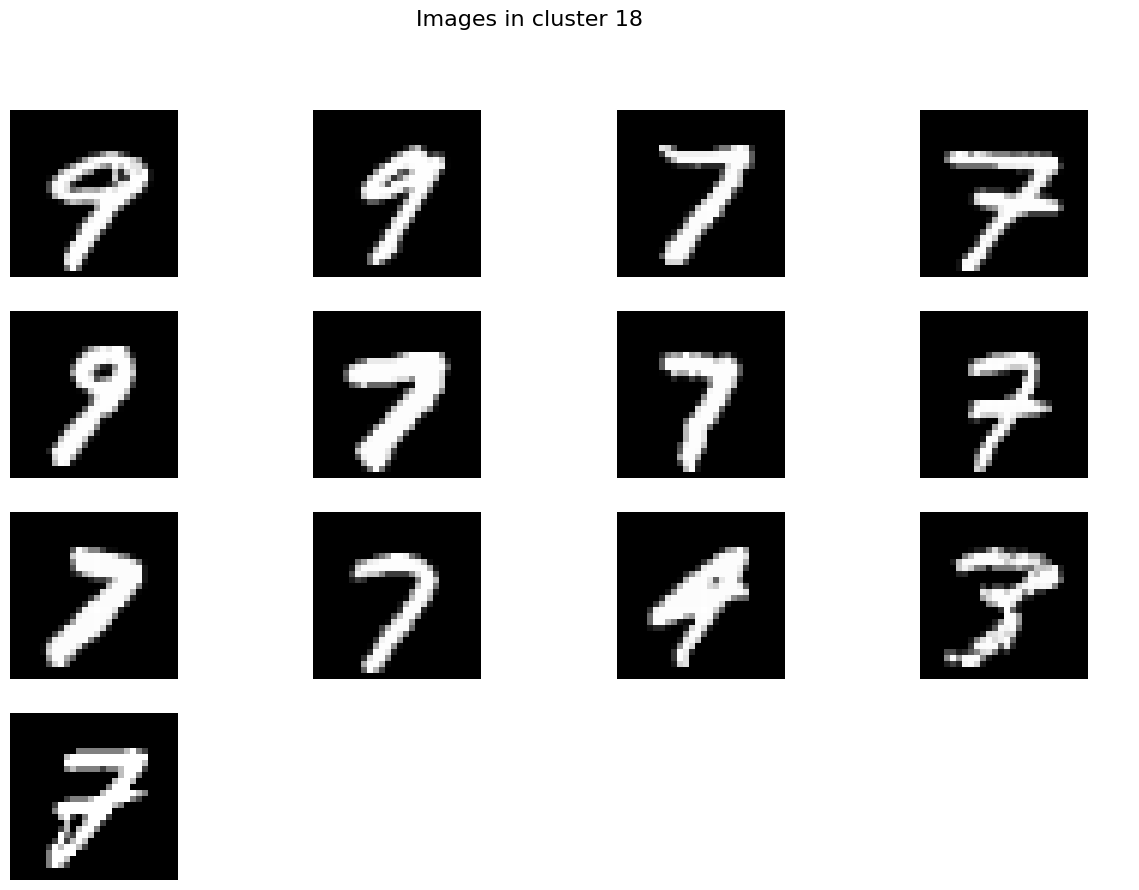

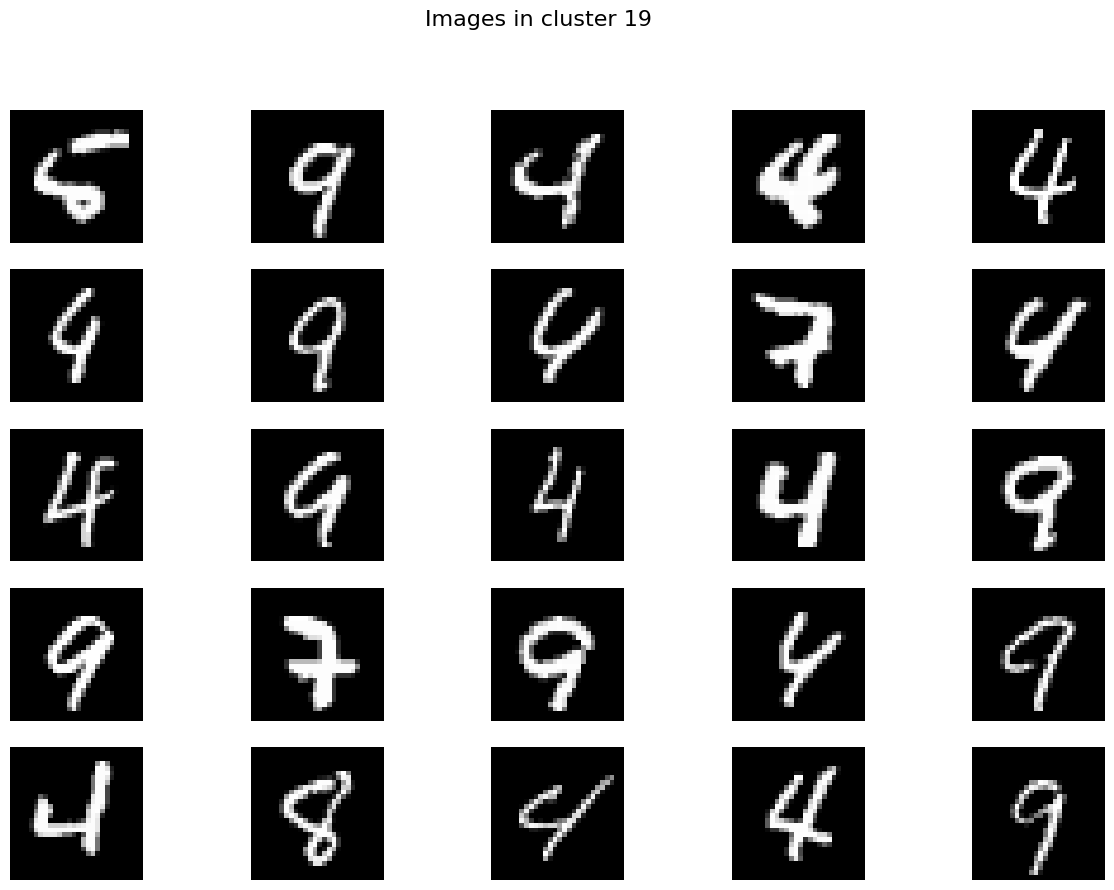

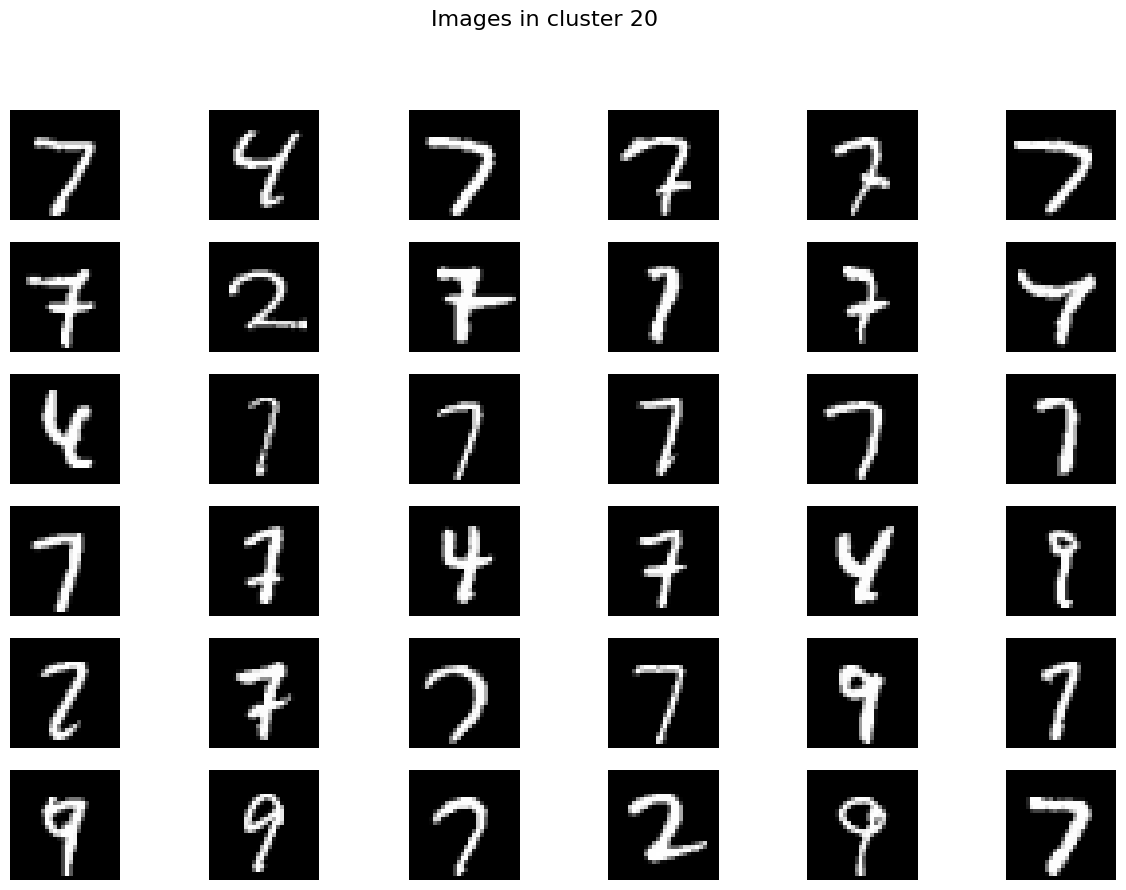

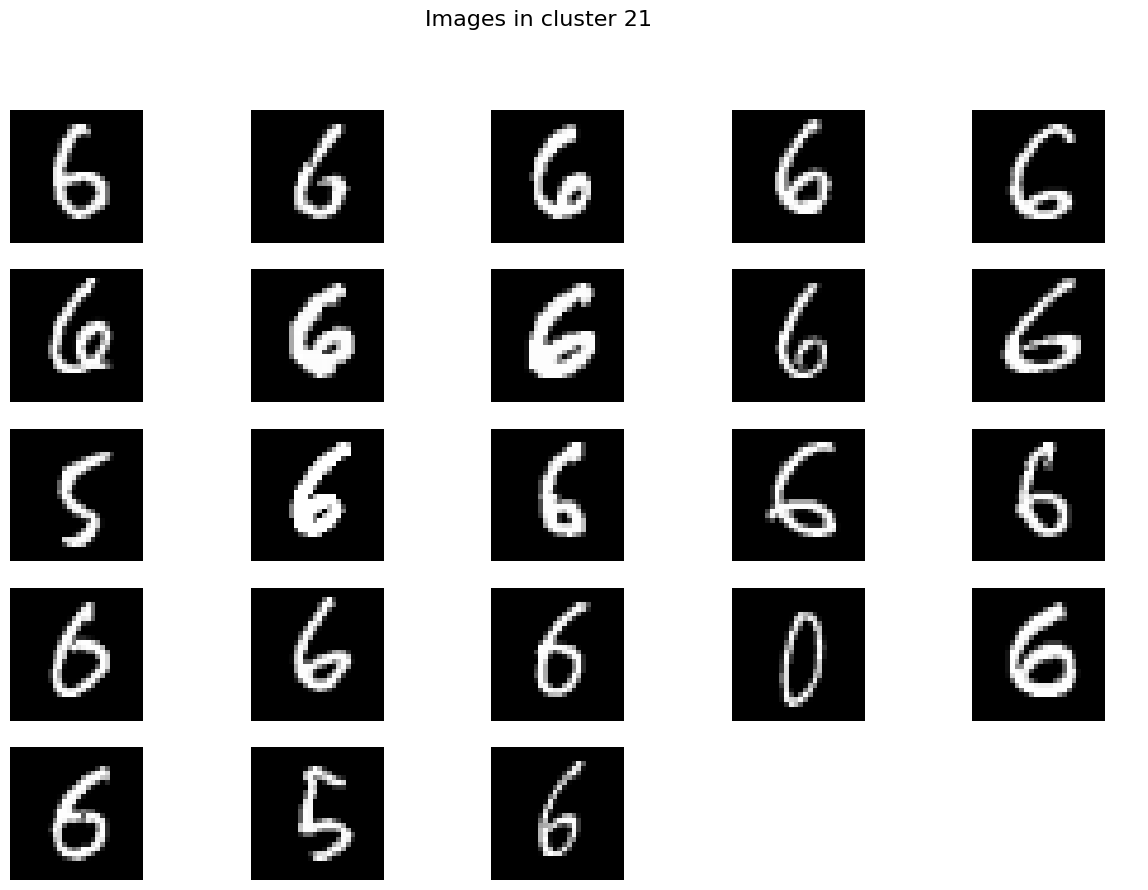

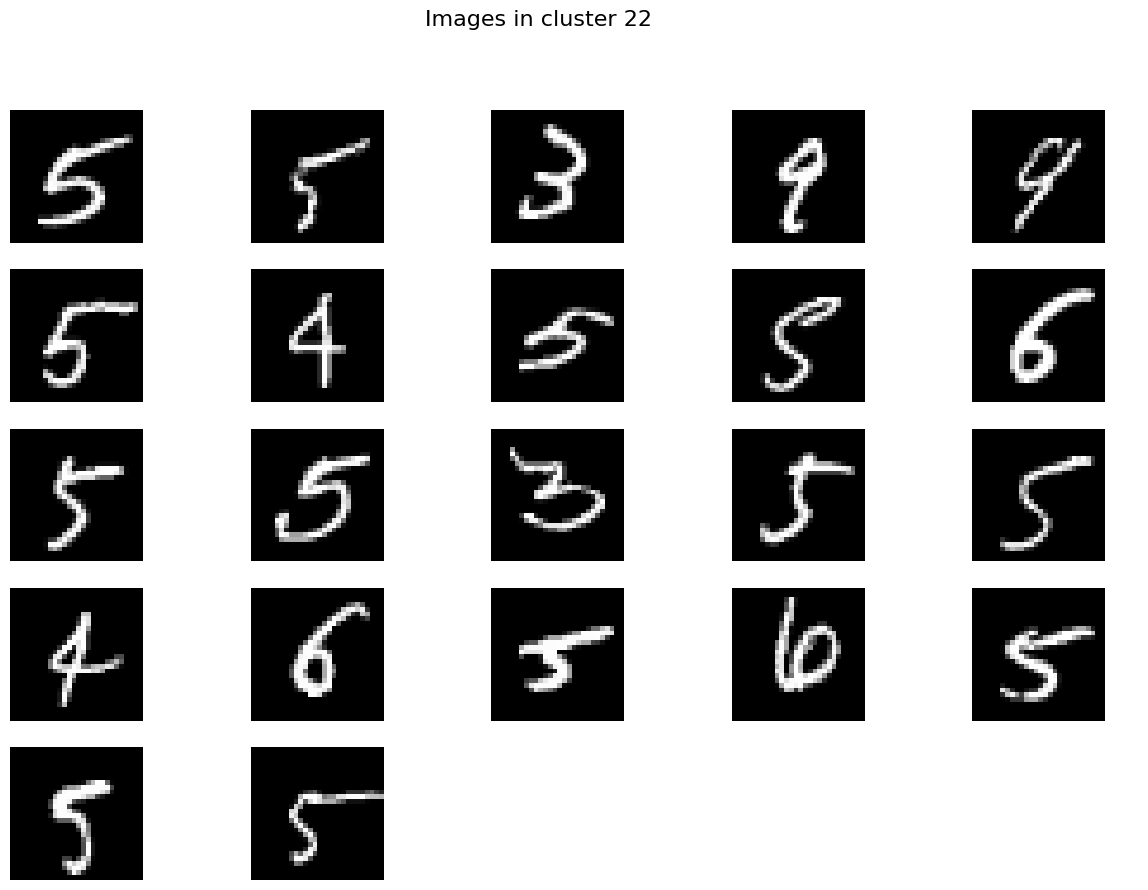

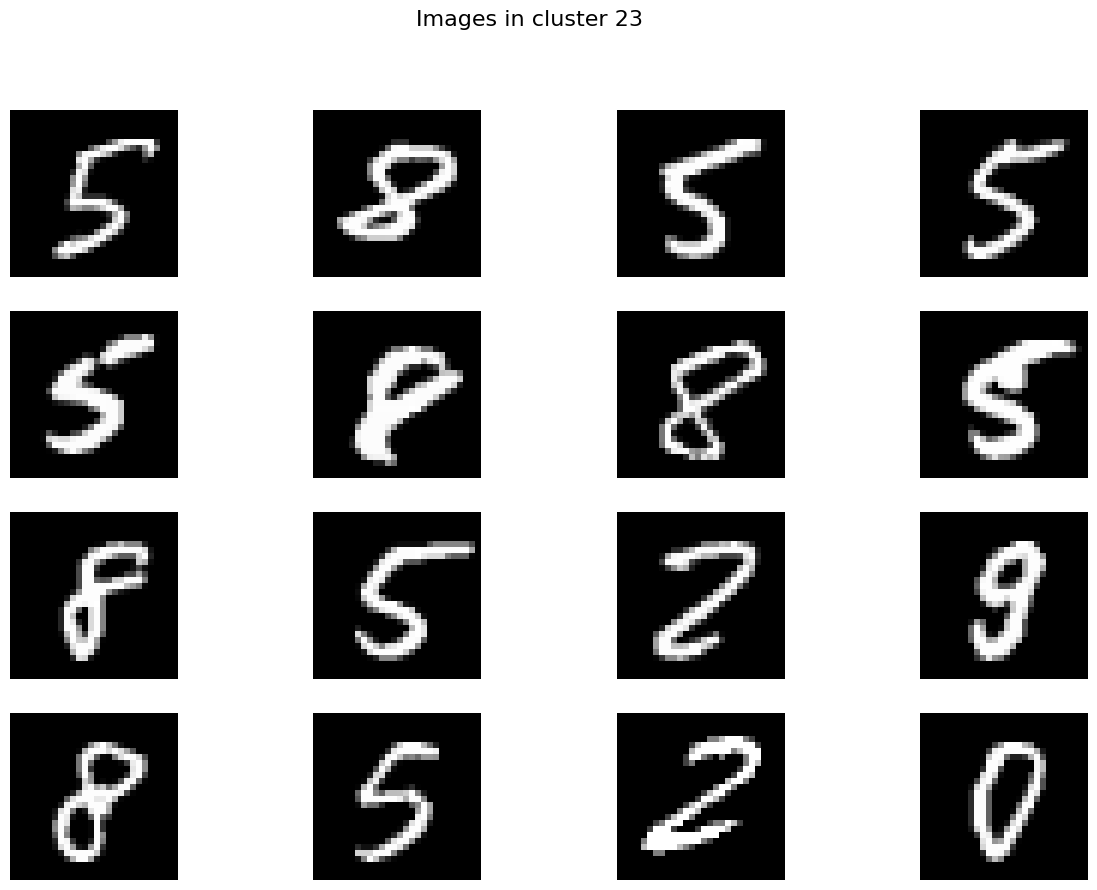

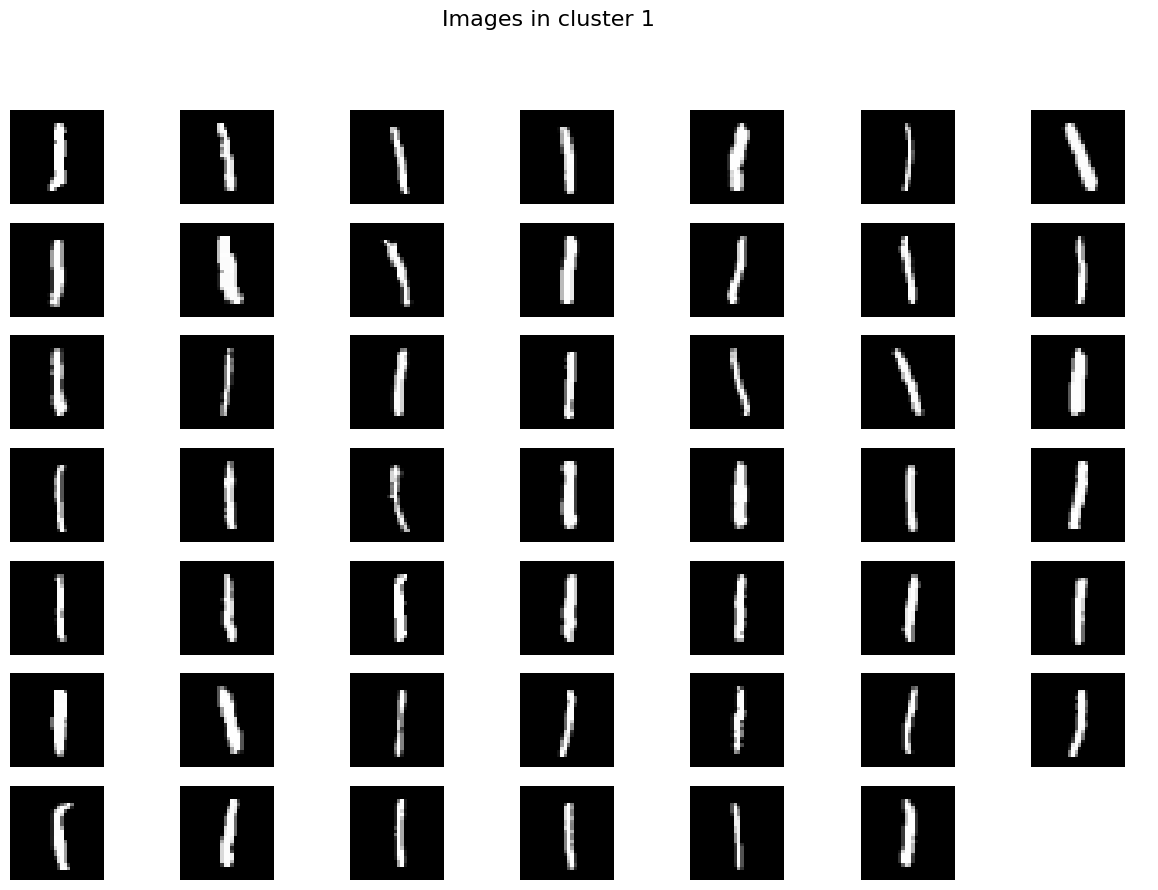

In [715]:
# Plot all images per cluster
cl.plot(cmap='binary')

# Plot the images in a specific cluster
cl.plot(cmap='binary', labels=[1,25])

In [716]:
# The dendrogram is based on the high-dimensional feature space.
# cl.dendrogram()